# Learning from Imbalanced Insurance Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

import missingno as msno
import warnings
warnings.filterwarnings("ignore")

#Spliting Train Data / Test Data
from sklearn.model_selection import train_test_split

#Classifier Models
from sklearn.ensemble import RandomForestClassifier

#Evaluation
from sklearn import metrics

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#UnderSampling
from imblearn.under_sampling import RandomUnderSampler 

#OverSampling
from imblearn.over_sampling import ADASYN 
from imblearn.over_sampling import SMOTE

#UnderOverSampling
from imblearn.combine import SMOTEENN 
from imblearn.combine import SMOTETomek 

# Loading Dataset

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Stat_Competition/archive/aug_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Stat_Competition/archive/aug_test.csv")
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [ ]:
print("Number of observations at the dataset : {}".format(data.shape[0]))
print("Number of columns at the dataset : {}".format(data.shape[1]))

Number of observations at the dataset : 382154
Number of columns at the dataset : 12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


## Missing Values Analysis

In [ ]:
#NaN data check
data.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

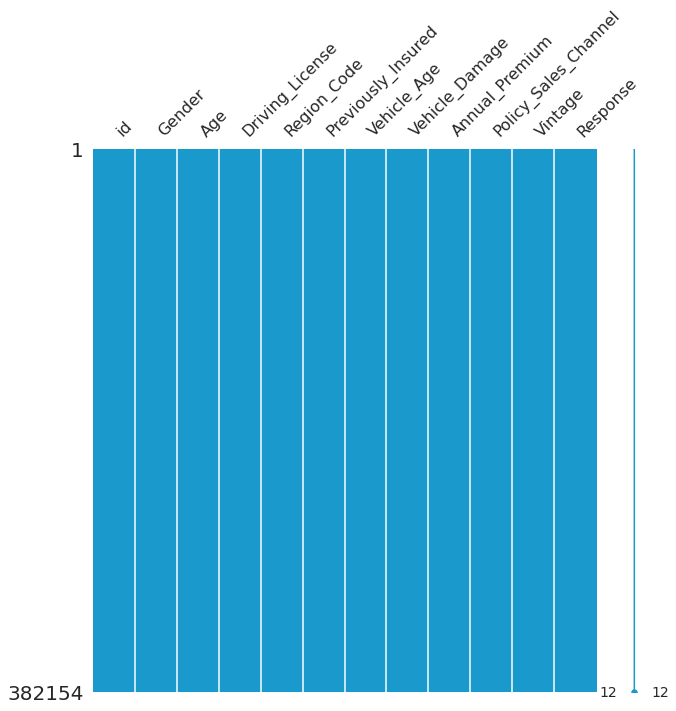

In [ ]:
#Visualization of NaN Values
msno.matrix(data.iloc[:,:], figsize = (10, 10), color=(0.1, 0.6, 0.8))
plt.show()

## Target Data Analysis

0    319553
1     62601
Name: Response, dtype: int64


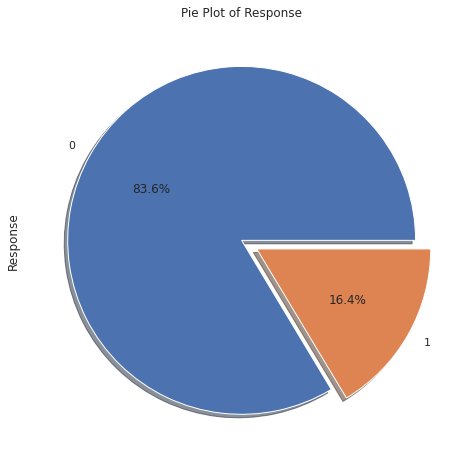

In [ ]:
print(data.Response.value_counts())

data.Response.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", figsize = (10,8), shadow = True)
plt.title("Pie Plot of Response")
plt.show()

#Imbalanced Target Data

## Summary for each columns

In [ ]:
for col in data.columns:
  describe = data[col].describe()
  print("Stats for column '{}': \n{}".format(col, describe))
  print("")

## Outliers at Annual_Premium is observed

Stats for column 'id': 
count    382154.000000
mean     234392.953477
std      139527.487326
min           1.000000
25%      115006.250000
50%      230461.500000
75%      345434.750000
max      508145.000000
Name: id, dtype: float64

Stats for column 'Gender': 
count     382154
unique         2
top         Male
freq      205603
Name: Gender, dtype: object

Stats for column 'Age': 
count    382154.000000
mean         38.545691
std          15.226897
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

Stats for column 'Driving_License': 
count    382154.000000
mean          0.998108
std           0.043455
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64

Stats for column 'Region_Code': 
count    382154.000000
mean         26.406867
std          13.181241
min           0.000000
25%          15.0000

# Outlier Management at Annual_Premium

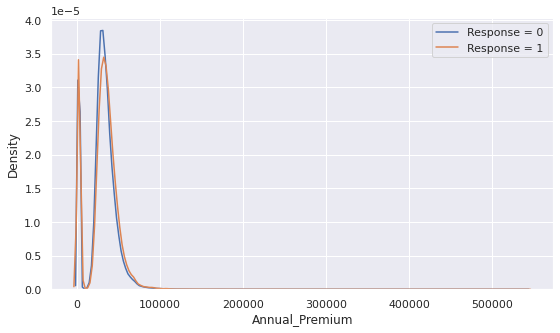

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(data[data.Response == 0]["Annual_Premium"], ax = ax)
sns.kdeplot(data[data.Response == 1]["Annual_Premium"], ax = ax)
plt.legend(["Response = 0", "Response = 1"])
plt.show()

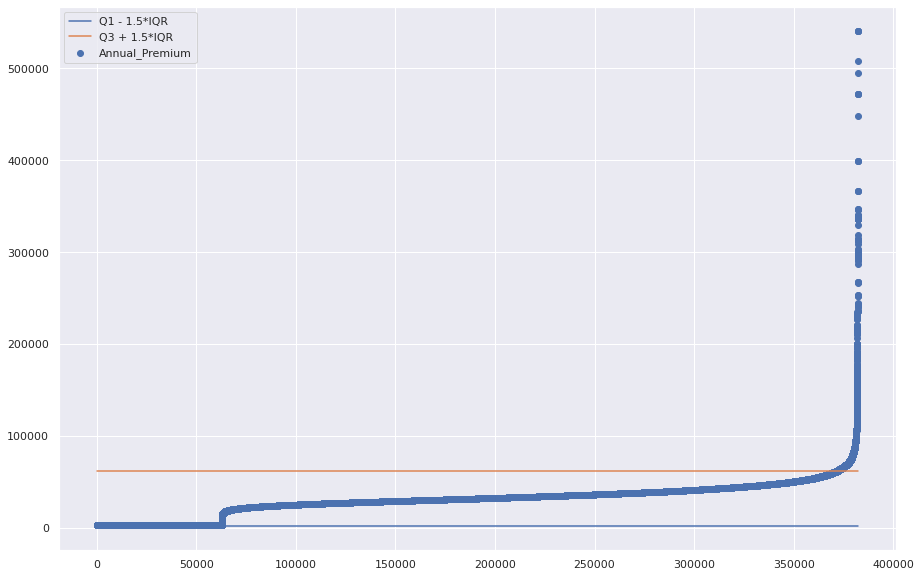

In [ ]:
#Visualization of the increase of Anuual_Premium values
q1 = np.quantile(data.Annual_Premium, 0.25)
q3 = np.quantile(data.Annual_Premium, 0.75)
iqr = q3 - q1

ap_Sorted = data.Annual_Premium.sort_values(ascending = True)
x = range(0, len(ap_Sorted))

plt.figure(figsize = (15,10))
plt.plot([0, len(ap_Sorted)], [q1 - 1.5*iqr, q1 - 1.5*iqr])
plt.plot([0, len(ap_Sorted)], [q3 + 1.5*iqr, q3 + 1.5*iqr])
plt.scatter(x, ap_Sorted)
plt.legend(["Q1 - 1.5*IQR", "Q3 + 1.5*IQR", "Annual_Premium"])
plt.show()

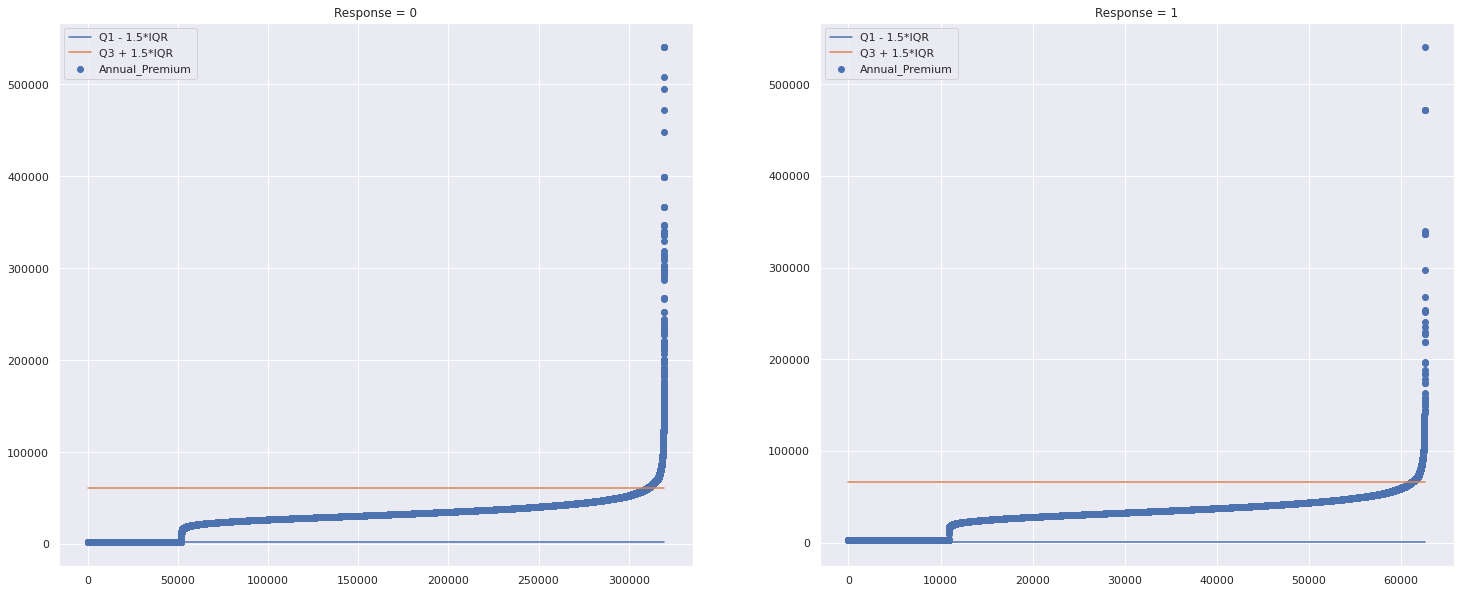

In [ ]:
#Visualization of Annual_Premium for each Response values

f, ax = plt.subplots(1, 2, figsize = (25,10))

q1_0 = np.quantile(data[data.Response == 0]["Annual_Premium"], 0.25)
q3_0 = np.quantile(data[data.Response == 0]["Annual_Premium"], 0.75)
iqr_0 = q3_0 - q1_0

ap_Sorted_0 = data[data.Response == 0]["Annual_Premium"].sort_values(ascending = True)

x_0 = range(0, len(ap_Sorted_0))

ax[0].plot([0, len(ap_Sorted_0)], [q1_0 - 1.5 * iqr_0, q1_0 - 1.5 * iqr_0])
ax[0].plot([0, len(ap_Sorted_0)], [q3_0 + 1.5 * iqr_0, q3_0 + 1.5 * iqr_0])
ax[0].scatter(x_0, ap_Sorted_0)
ax[0].legend(["Q1 - 1.5*IQR", "Q3 + 1.5*IQR", "Annual_Premium"])
ax[0].set_title("Response = 0")

################################################################################

q1_1 = np.quantile(data[data.Response == 1]["Annual_Premium"], 0.25)
q3_1 = np.quantile(data[data.Response == 1]["Annual_Premium"], 0.75)
iqr_1 = q3_1 - q1_1

ap_Sorted_1 = data[data.Response == 1]["Annual_Premium"].sort_values(ascending = True)

x_1 = range(0, len(ap_Sorted_1))

ax[1].plot([0, len(ap_Sorted_1)], [q1_1 - 1.5 * iqr_1, q1_1 - 1.5 * iqr_1])
ax[1].plot([0, len(ap_Sorted_1)], [q3_1 + 1.5 * iqr_1, q3_1 + 1.5 * iqr_1])
ax[1].scatter(x_1, ap_Sorted_1)
ax[1].legend(["Q1 - 1.5*IQR", "Q3 + 1.5*IQR", "Annual_Premium"])
ax[1].set_title("Response = 1")

plt.show()

In [ ]:
# How big are the size of outliers?
q1 = np.quantile(data.Annual_Premium, 0.25)
q3 = np.quantile(data.Annual_Premium, 0.75)
iqr = q3 - q1

outlier = data[(data.Annual_Premium < q1 - 1.5*iqr) | (data.Annual_Premium > q3 + 1.5*iqr)]
trimmed = data[(data.Annual_Premium > q1 - 1.5*iqr) & (data.Annual_Premium < q3 + 1.5*iqr)]

# 2*2 Spreadsheet for Outliers and Response Value
conclusion = pd.DataFrame({
    "Normal_Data" : [len(trimmed[trimmed.Response == 0]), len(trimmed[trimmed.Response == 1])],
    "Outliers" : [len(outlier[outlier.Response == 0]), len(outlier[outlier.Response == 1])]},
    index = ["Response = 0", "Response = 1"])

conclusion

,Normal_Data,Outliers
Response = 0,311222,8331
Response = 1,60525,2076


In [ ]:
# Outlier Trim for Annual_Premium
q1 = np.quantile(data.Annual_Premium, 0.25)
q3 = np.quantile(data.Annual_Premium, 0.75)
iqr = q3 - q1

data = data[(data.Annual_Premium > q1 - 1.5*iqr) & (data.Annual_Premium < q3 + 1.5*iqr)]
print("Number of Observations of Outlier Trimmed Data : {}".format(data.shape[0]))   # 371747

Number of Observations of Outlier Trimmed Data : 371747


In [ ]:
#Summary of Outlier Trimmed Data
data["Annual_Premium"].describe()

count    371747.00000
mean      29413.88189
std       14612.83127
min        2630.00000
25%       24270.00000
50%       31339.00000
75%       38637.00000
max       61800.00000
Name: Annual_Premium, dtype: float64

# MetaData

In [ ]:
a = []
for c in data.columns:
  #Set Varname
  varname = c

  #Set Role
  if c =="id":
    role = "id"
  elif c == "Response":
    role = "target"
  else:
    role = "input"

  #Set Keep
  keep = True

  #Set dtype
  dtype = data[c].dtype

  c_dict = {"varname" : varname,
            "role" : role,
            "keep" : keep,
            "dtype" : dtype}
  a.append(c_dict)

meta = pd.DataFrame(a)
meta.set_index("varname", drop = True, inplace = True)
meta["level"] = ["nominal","binary","interval","binary","nominal","binary","ordinal","binary","interval","nominal","interval","binary"]

meta

,role,keep,dtype,level
varname,,,,
id,id,True,int64,nominal
Gender,input,True,object,binary
Age,input,True,int64,interval
Driving_License,input,True,int64,binary
Region_Code,input,True,float64,nominal
Previously_Insured,input,True,int64,binary
Vehicle_Age,input,True,object,ordinal
Vehicle_Damage,input,True,object,binary
Annual_Premium,input,True,float64,interval


# EDA

## Gender (Binary)

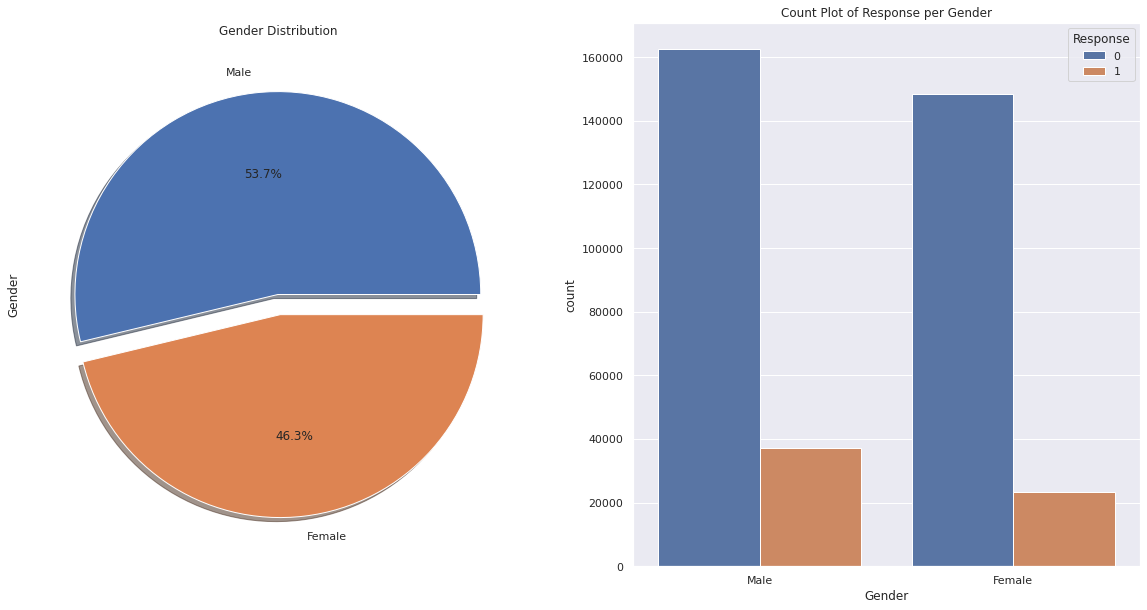

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,10)) 

data.Gender.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", shadow = True, ax = ax[0])
ax[0].set_title("Gender Distribution")

sns.countplot("Gender", hue = "Response", data = data, ax = ax[1])
ax[1].set_title("Count Plot of Response per Gender")

plt.show()

## Age (Interval)

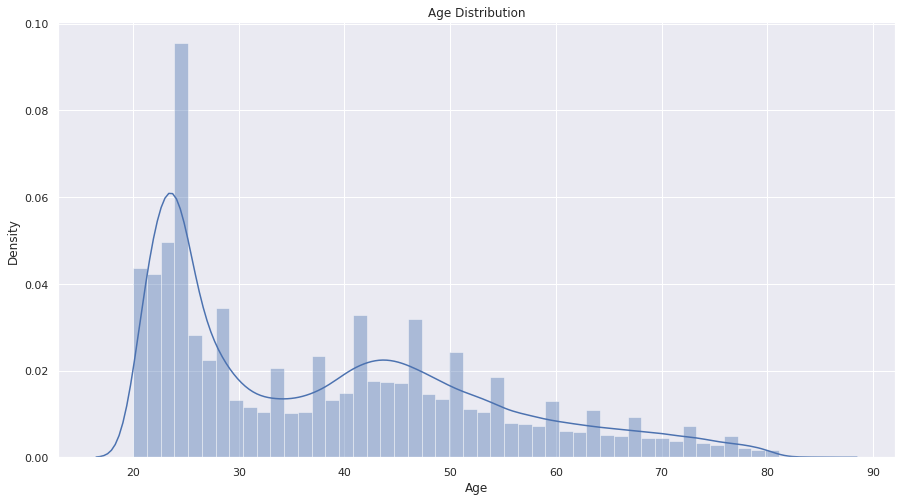

In [ ]:
plt.figure(figsize = (15,8))
sns.distplot(data.Age).set_title('Age Distribution')
plt.show()

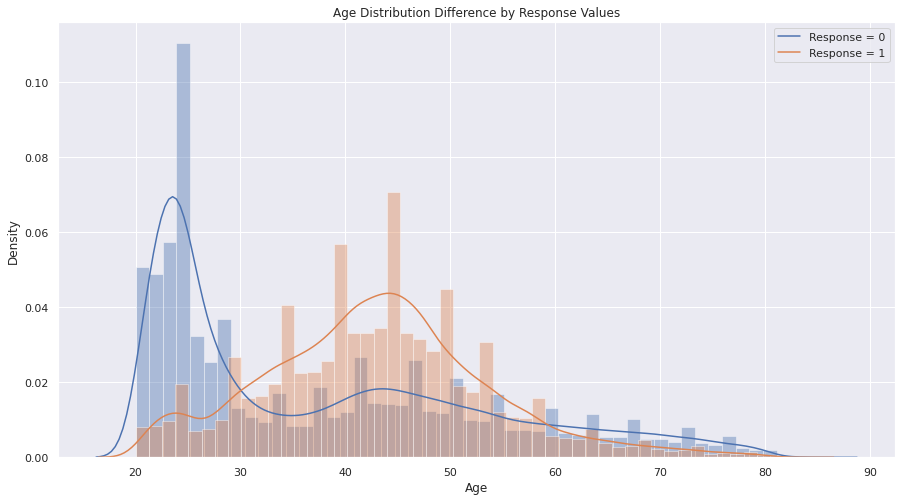

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (15,8))
sns.distplot(data[data.Response == 0]["Age"], ax = ax)
sns.distplot(data[data.Response == 1]["Age"], ax = ax)
plt.title("Age Distribution Difference by Response Values")
plt.legend(["Response = 0", "Response = 1"])
plt.show()

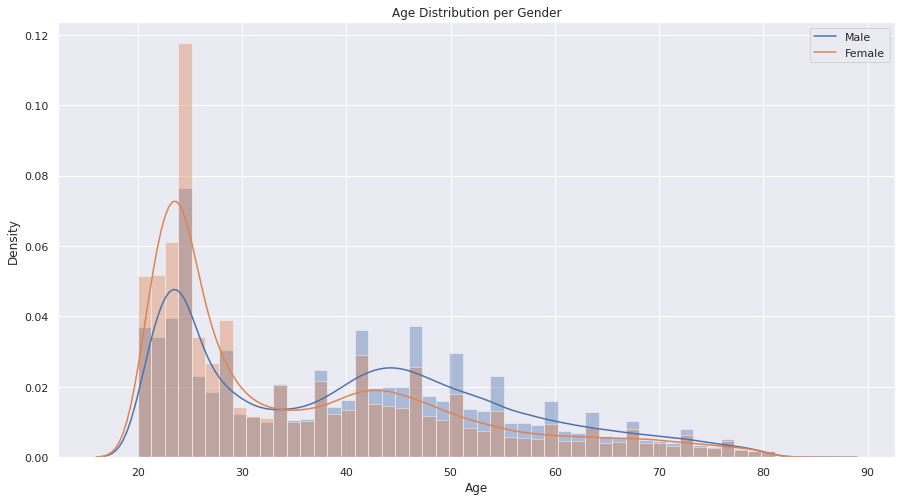

In [ ]:
plt.figure(figsize = (15,8))
sns.distplot(data.loc[data.Gender == "Male", "Age"])
sns.distplot(data.loc[data.Gender == "Female", "Age"])
plt.title('Age Distribution per Gender')
plt.legend(["Male", "Female"])
plt.show()

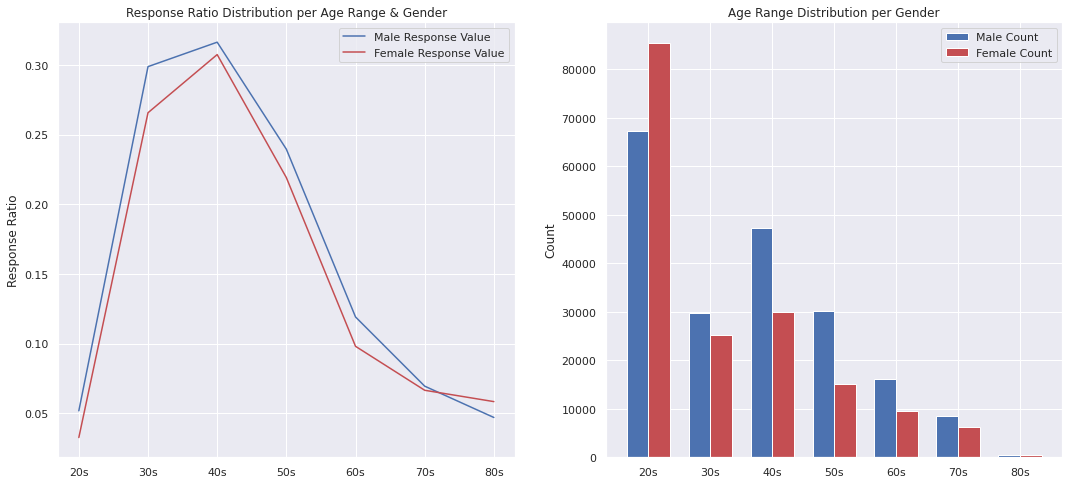

In [ ]:
df = data.loc[:, ["Gender", "Age", "Response"]] 
df["Age_range_gender"] = 0
df["Count"] = 1

for n in range(20,90,10):
  df.loc[(df.Age >= n) & (df.Age < n+10) & (df.Gender == "Male"), "Age_range_gender"] = str(n) + "s_Male"
  df.loc[(df.Age >= n) & (df.Age < n+10) & (df.Gender == "Female"), "Age_range_gender"] = str(n) + "s_Female"

agg = pd.concat([df.groupby("Age_range_gender").mean()["Response"], df.groupby("Age_range_gender").sum()["Count"]], axis = 1)

#####################################################################################
# Visualization
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s"]
x = np.arange(len(labels))
width = 0.35
men = [1,3,5,7,9,11,13]
women = [0,2,4,6,8,10,12]

f, ax = plt.subplots(1, 2, figsize = (18,8))
ax[0].plot(x, agg.Response[men], color = "b")
ax[0].plot(x, agg.Response[women], color = "r")
ax[0].legend(["Male Response Value", "Female Response Value"])
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel("Response Ratio")
ax[0].set_title("Response Ratio Distribution per Age Range & Gender")

ax[1].bar(x - width/2, agg.Count[[1,3,5,7,9,11,13]], width, color = "b")
ax[1].bar(x + width/2, agg.Count[[0,2,4,6,8,10,12]], width, color = "r")
ax[1].legend(["Male Count", "Female Count"])
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_ylabel("Count")
ax[1].set_title("Age Range Distribution per Gender")

plt.show()

## Driving_License (Binary)

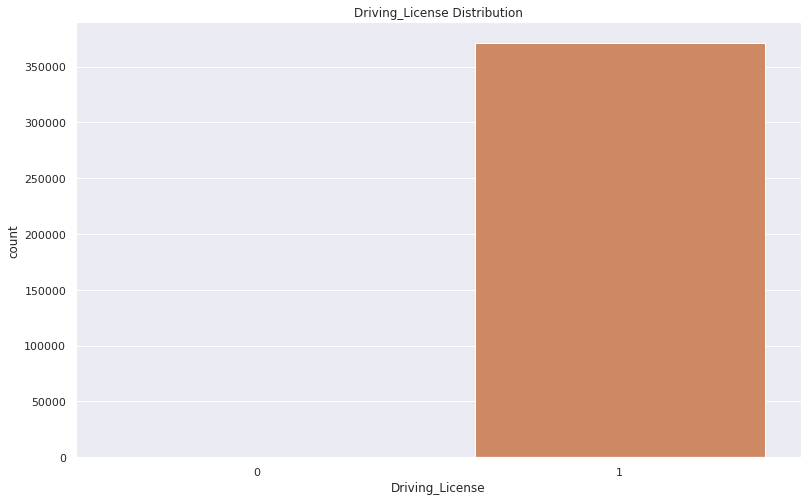

In [ ]:
plt.figure(figsize = (13,8))
sns.countplot(data['Driving_License'])
plt.title("Driving_License Distribution")
plt.show()

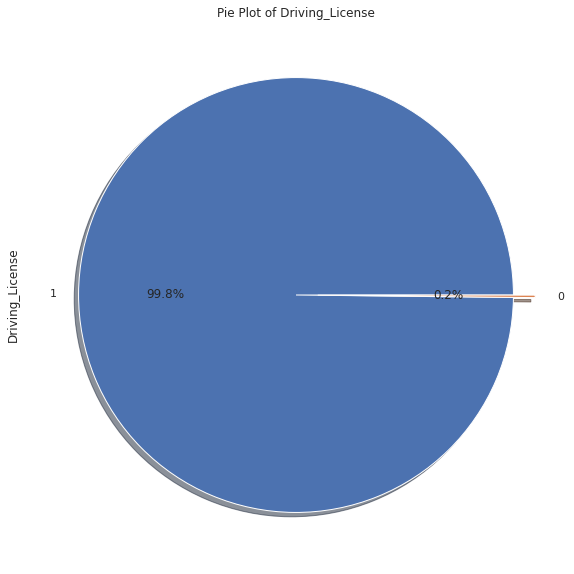

In [ ]:
plt.figure(figsize = (15,10))
data.Driving_License.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", shadow = True)
plt.title("Pie Plot of Driving_License")
plt.show()

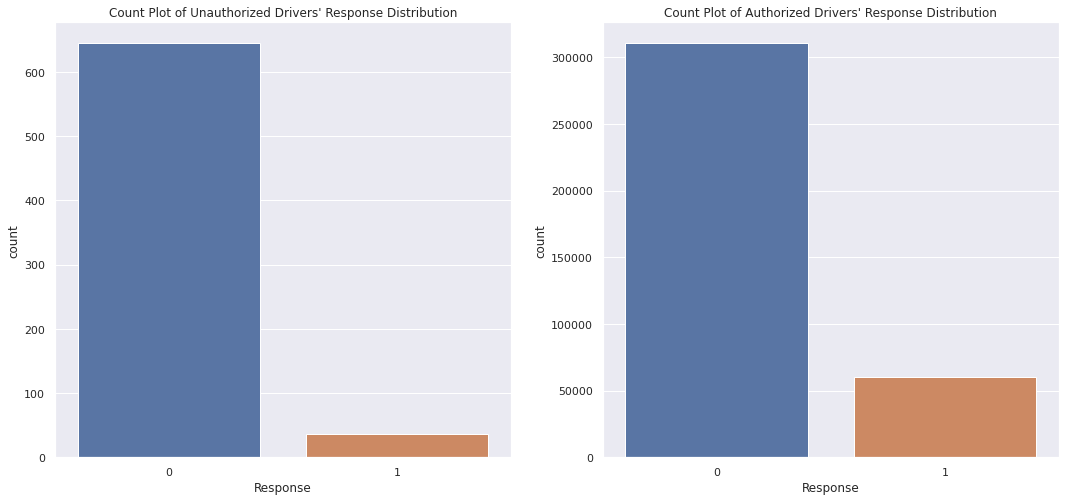

In [ ]:
f, ax= plt.subplots(1, 2, figsize = (18,8))
sns.countplot(data.loc[data['Driving_License'] == 0]['Response'], ax = ax[0])
ax[0].set_title("Count Plot of Unauthorized Drivers' Response Distribution")

sns.countplot(data.loc[data['Driving_License'] == 1]['Response'], ax = ax[1])
ax[1].set_title("Count Plot of Authorized Drivers' Response Distribution")

plt.show()

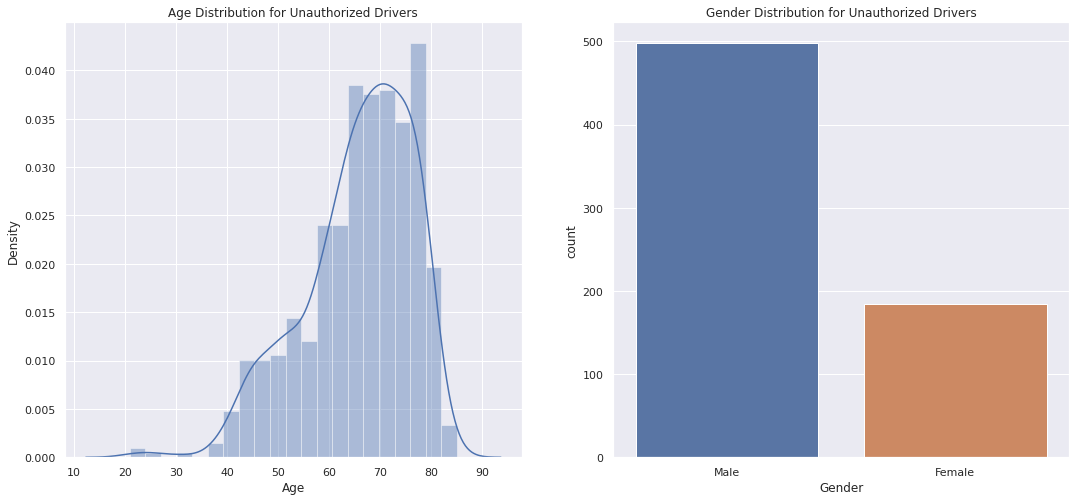

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
sns.distplot(data.loc[data.Driving_License == 0, "Age"], ax = ax[0])
sns.countplot(data.loc[data.Driving_License == 0, "Gender"], ax = ax[1])

ax[0].set_title("Age Distribution for Unauthorized Drivers")
ax[1].set_title("Gender Distribution for Unauthorized Drivers")


plt.show()

## Region_Code (Nominal)

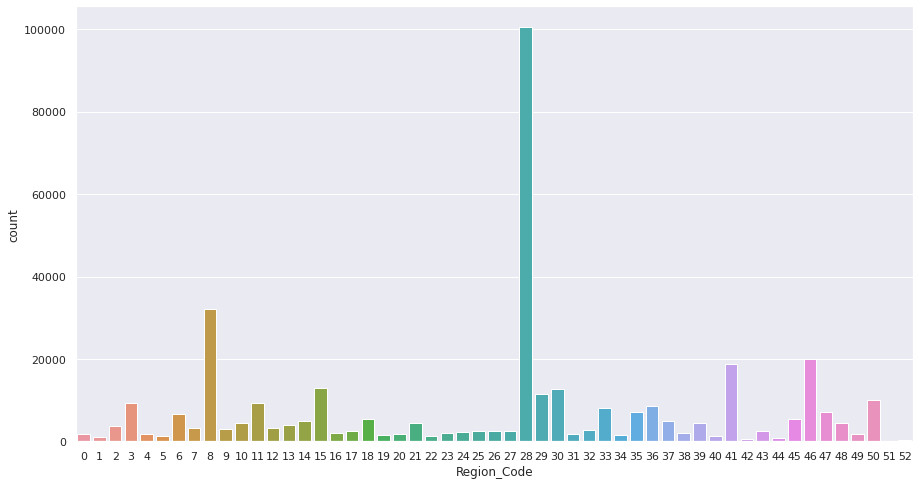

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = data.Region_Code.astype(int))
plt.show()

In [ ]:
gb_c = data.loc[:, ["Region_Code", "Response"]].astype(int).groupby("Region_Code").agg(["size", "mean"])
gb_c = gb_c.sort_values(by = ("Response", "size"), ascending = False)

region_analysis_c = pd.DataFrame({
    "Count" : gb_c[("Response", "size")], 
    "Ratio(%)" : 100 * gb_c[("Response", "size")] / data.shape[0],
    "Accuracy(%)" : 100 * gb_c[("Response", "mean")],
    "Accuracy_Count" : (gb_c[("Response", "size")] * gb_c[("Response", "mean")]).astype(int)
    })
region_analysis_c.head(10)

,Count,Ratio(%),Accuracy(%),Accuracy_Count
Region_Code,,,,
28,100533,27.043392,26.410233,26551
8,32071,8.627104,12.890150,4134
46,20083,5.402330,13.394413,2690
41,18746,5.042677,15.987411,2997
15,12943,3.481669,9.062814,1173
30,12727,3.423565,9.122338,1161
29,11445,3.078707,17.125382,1960
50,10123,2.723089,6.539563,662
11,9272,2.494169,14.808024,1373


## Previously_Insured (Binary)

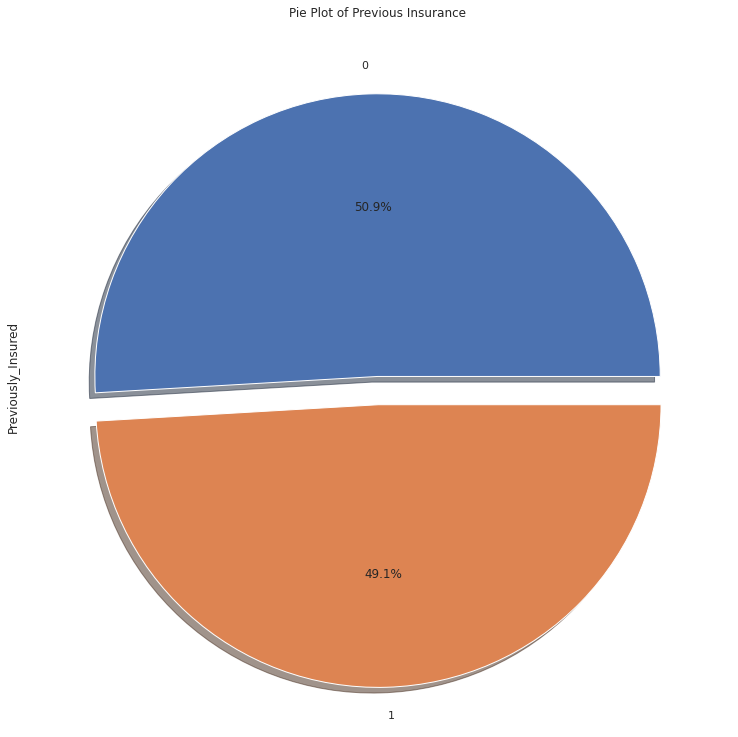

In [ ]:
data.Previously_Insured.value_counts().plot.pie(explode = [0, 0.1], figsize = (13,13), autopct = "%1.1f%%", shadow = True)
plt.title("Pie Plot of Previous Insurance")
plt.show()

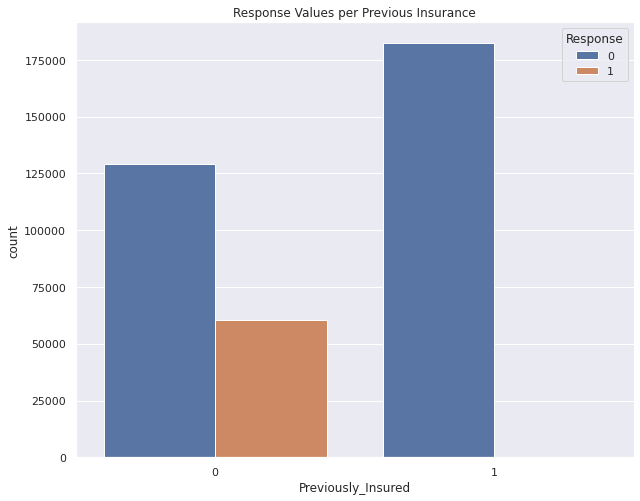

In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(x = "Previously_Insured", hue = "Response", data = data)
plt.title("Response Values per Previous Insurance")
plt.show()

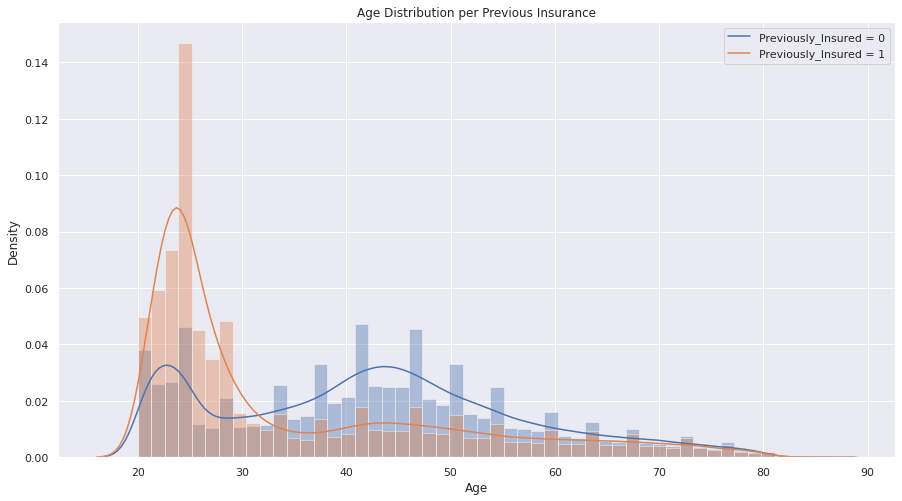

In [ ]:
plt.figure(figsize = (15,8))
sns.distplot(data.loc[data.Previously_Insured == 0, "Age"])
sns.distplot(data.loc[data.Previously_Insured == 1, "Age"])
plt.title('Age Distribution per Previous Insurance')
plt.legend(["Previously_Insured = 0", "Previously_Insured = 1"])
plt.show()

## Vehicle_Age (Ordinal)

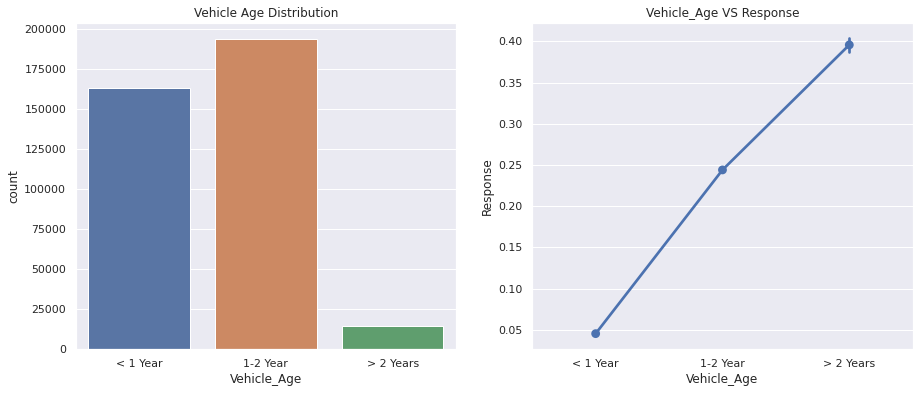

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (15,6))

sns.countplot(x = "Vehicle_Age", data = data, ax = ax[0])
ax[0].set_title("Vehicle Age Distribution")

sns.pointplot(x = 'Vehicle_Age', y = 'Response', data = data, ax = ax[1])
ax[1].set_title('Vehicle_Age VS Response')

plt.show()

<Figure size 1080x576 with 0 Axes>

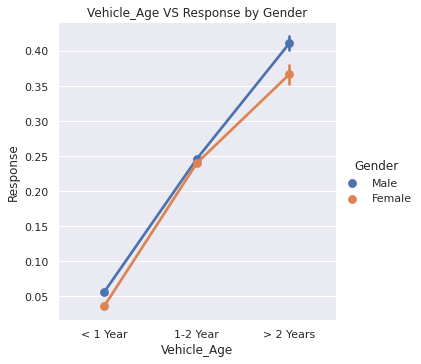

In [ ]:
plt.figure(figsize = (15,8))
sns.factorplot(x = 'Vehicle_Age', y = 'Response', data = data, hue = 'Gender').set(title = 'Vehicle_Age VS Response by Gender')
plt.show()

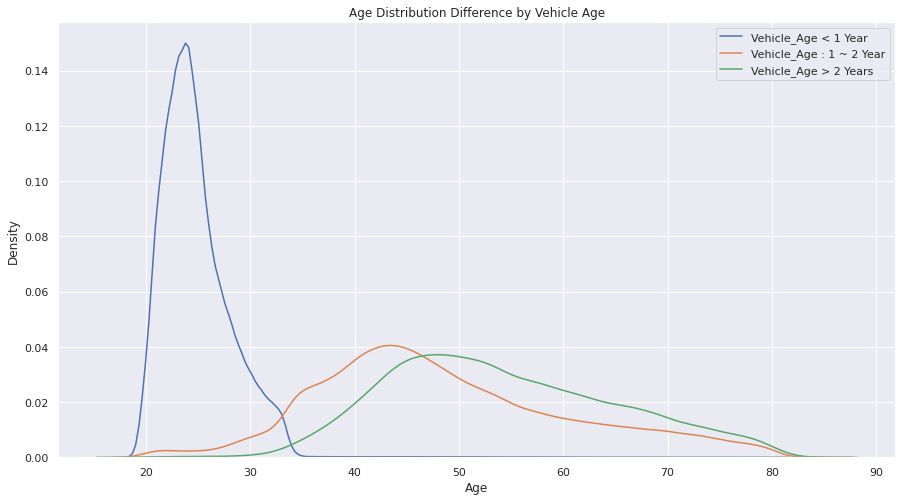

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (15,8))
sns.kdeplot(data[data.Vehicle_Age == "< 1 Year"]["Age"], bw_adjust = 1.7, ax = ax)
sns.kdeplot(data[data.Vehicle_Age == "1-2 Year"]["Age"], ax = ax)
sns.kdeplot(data[data.Vehicle_Age == "> 2 Years"]["Age"], ax = ax)
plt.legend(["Vehicle_Age < 1 Year", "Vehicle_Age : 1 ~ 2 Year", "Vehicle_Age > 2 Years"])
plt.title("Age Distribution Difference by Vehicle Age")
plt.show()

## Vehicle_Damage (Binary) 

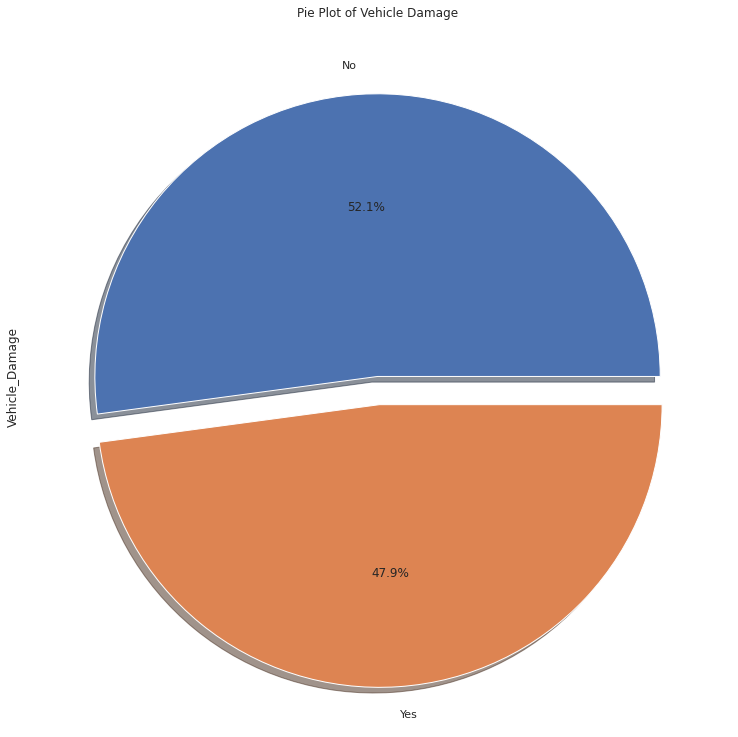

In [ ]:
data.Vehicle_Damage.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", figsize = (13,13), shadow = True)
plt.title("Pie Plot of Vehicle Damage")
plt.show()

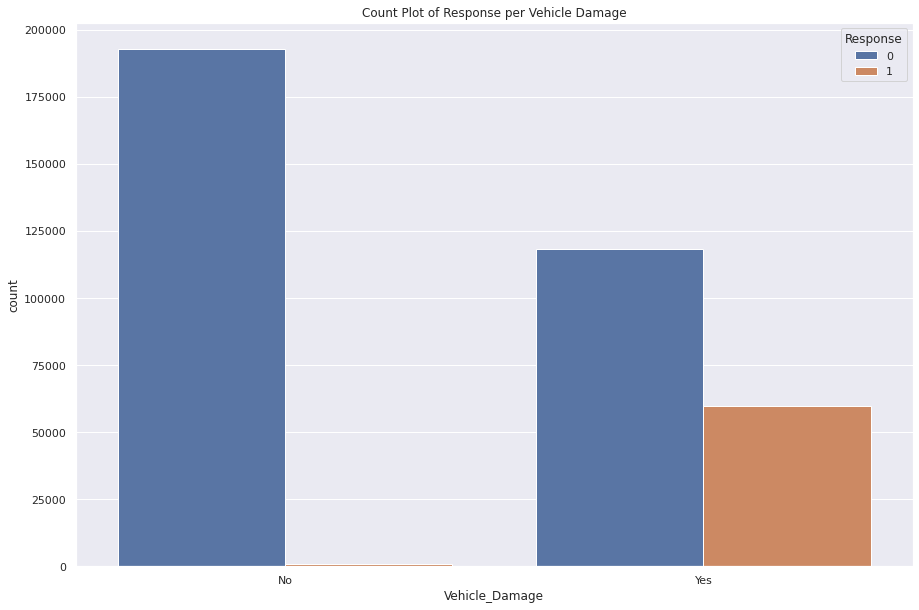

In [ ]:
plt.figure(figsize = (15,10))
sns.countplot(x = "Vehicle_Damage", hue = "Response", data = data)
plt.title("Count Plot of Response per Vehicle Damage")
plt.show()

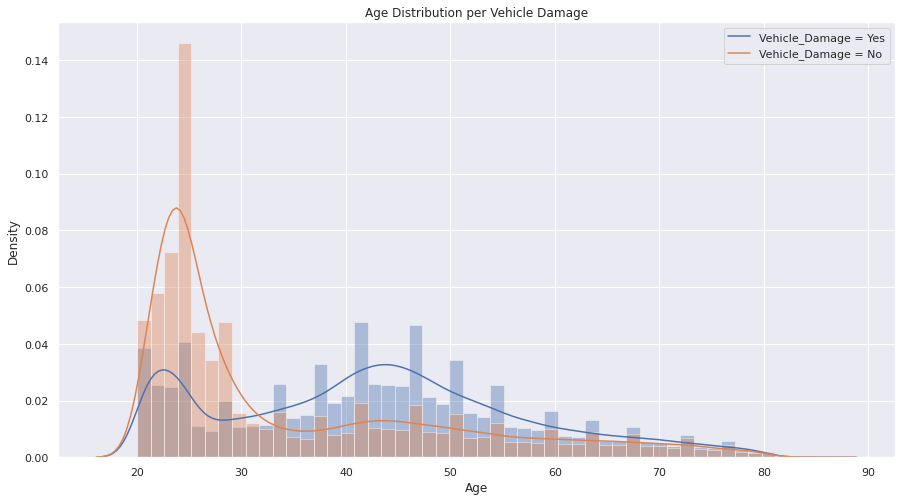

In [ ]:
plt.figure(figsize = (15,8))
sns.distplot(data.loc[data.Vehicle_Damage == "Yes", "Age"])
sns.distplot(data.loc[data.Vehicle_Damage == "No", "Age"])
plt.title('Age Distribution per Vehicle Damage')
plt.legend(["Vehicle_Damage = Yes", "Vehicle_Damage = No"])
plt.show()

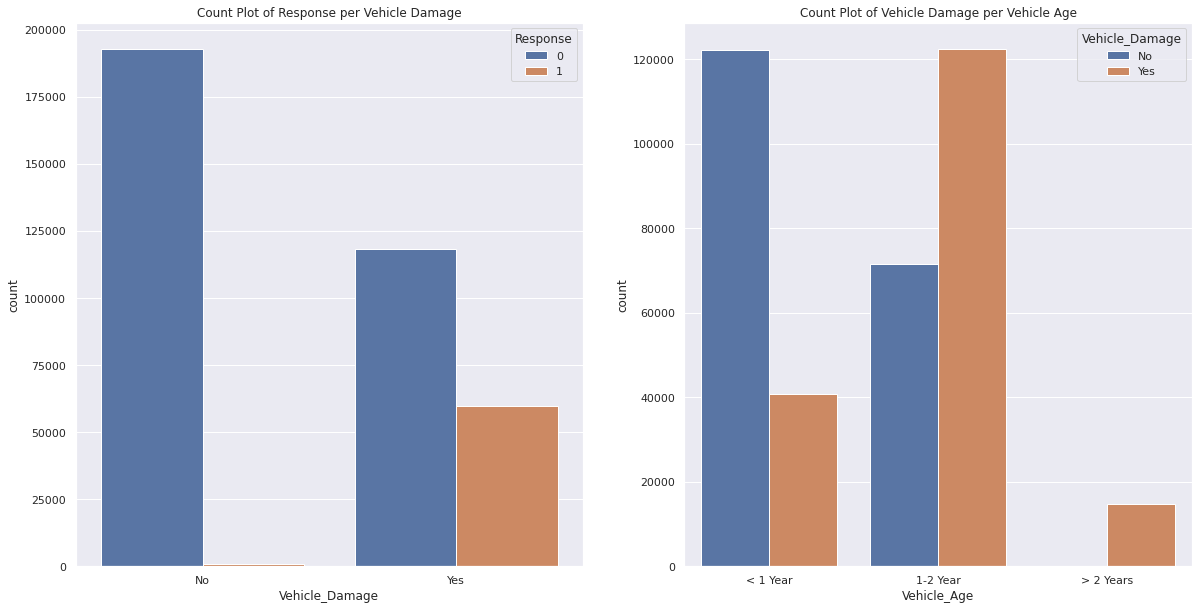

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20,10))

sns.countplot(x = "Vehicle_Damage", hue = "Response", data = data, ax = ax[0])
ax[0].set_title("Count Plot of Response per Vehicle Damage")

sns.countplot(x = "Vehicle_Age", hue = "Vehicle_Damage", data = data, ax = ax[1])
ax[1].set_title("Count Plot of Vehicle Damage per Vehicle Age")

plt.show()

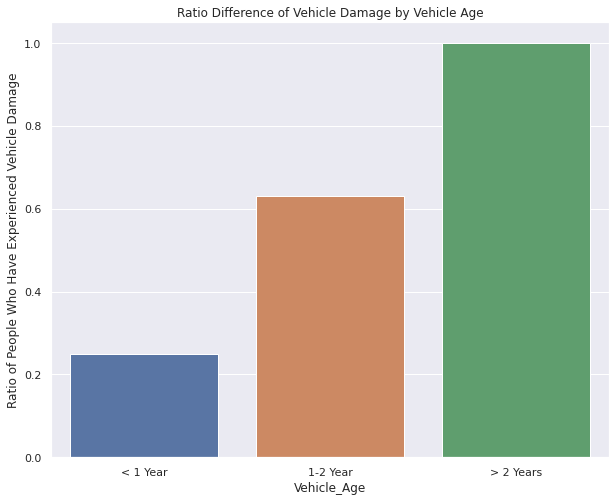

In [ ]:
# Vechile_Damage, Vehicle_Age
vehicle = data.loc[:, ["Vehicle_Damage", "Vehicle_Age", "Gender"]]    

vehicle.loc[vehicle.Vehicle_Damage == "No", "Vehicle_Damage"] = 0
vehicle.loc[vehicle.Vehicle_Damage == "Yes", "Vehicle_Damage"] = 1  

plt.figure(figsize = (10,8))
sns.barplot(x = "Vehicle_Age", y = "Vehicle_Damage", 
            data = vehicle.groupby("Vehicle_Age", as_index = False).mean().sort_values(by = "Vehicle_Damage", ascending = True))
plt.title("Ratio Difference of Vehicle Damage by Vehicle Age")
plt.ylabel("Ratio of People Who Have Experienced Vehicle Damage")
plt.show()

<Figure size 936x720 with 0 Axes>

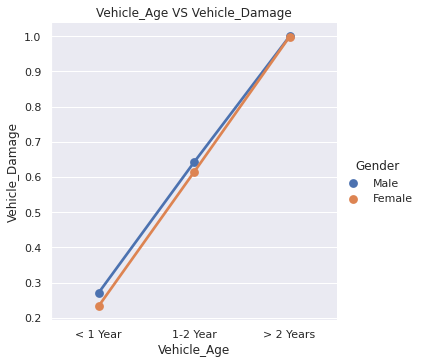

In [ ]:
plt.figure(figsize = (13,10))
sns.factorplot('Vehicle_Age','Vehicle_Damage', data = vehicle, hue = 'Gender').set(title='Vehicle_Age VS Vehicle_Damage')
plt.show()

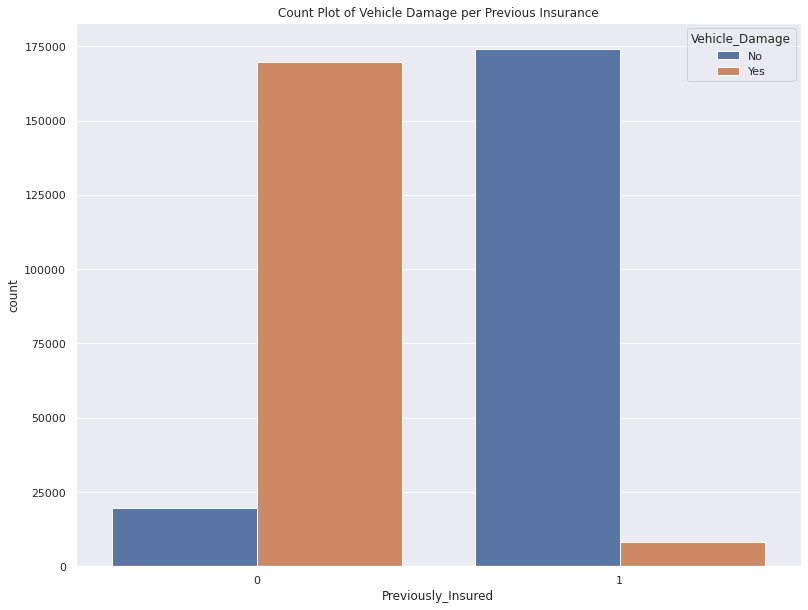

In [ ]:
plt.figure(figsize = (13,10))
sns.countplot(x = "Previously_Insured", hue = "Vehicle_Damage", data = data)
plt.title("Count Plot of Vehicle Damage per Previous Insurance")
plt.show()

<Figure size 1440x720 with 0 Axes>

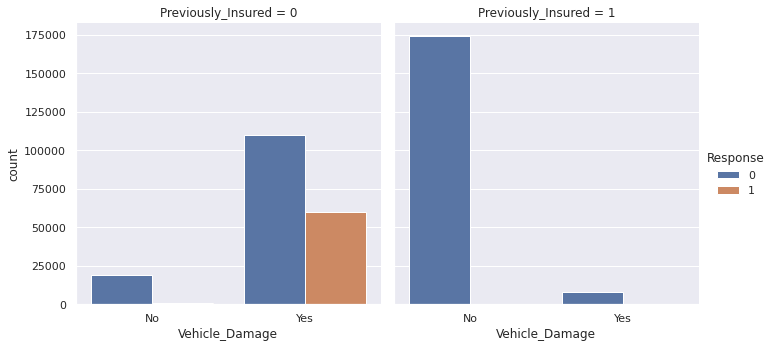

In [ ]:
plt.figure(figsize = (20,10))
sns.catplot(x = "Vehicle_Damage", col = "Previously_Insured", hue = "Response", data = data, kind = "count")
plt.show()

In [ ]:
data.groupby(["Previously_Insured", "Vehicle_Damage", "Response"]).size().unstack()

Response                                0      1
Previously_Insured Vehicle_Damage               
0                  No               18757    744
                   Yes             110153  59649
1                  No              174216     56
                   Yes               8096     76

## Annual_Premium (Interval)


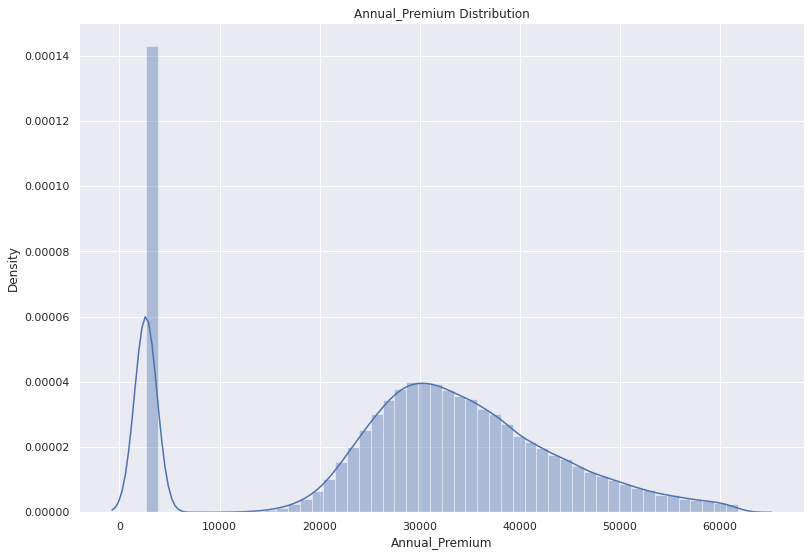

In [ ]:
plt.figure(figsize = (13,9))
sns.distplot(data["Annual_Premium"])
plt.title("Annual_Premium Distribution")
plt.show()

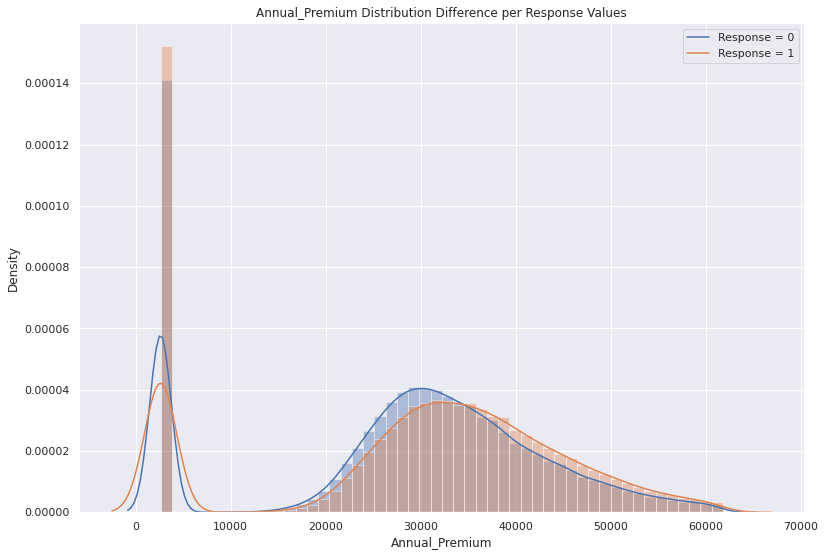

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (13,9))
sns.distplot(data[data.Response == 0]["Annual_Premium"], ax = ax)
sns.distplot(data[data.Response == 1]["Annual_Premium"], ax = ax)
plt.legend(["Response = 0", "Response = 1"])
plt.title("Annual_Premium Distribution Difference per Response Values")
plt.show()

In [ ]:
data.Annual_Premium.describe()

count    371747.00000
mean      29413.88189
std       14612.83127
min        2630.00000
25%       24270.00000
50%       31339.00000
75%       38637.00000
max       61800.00000
Name: Annual_Premium, dtype: float64

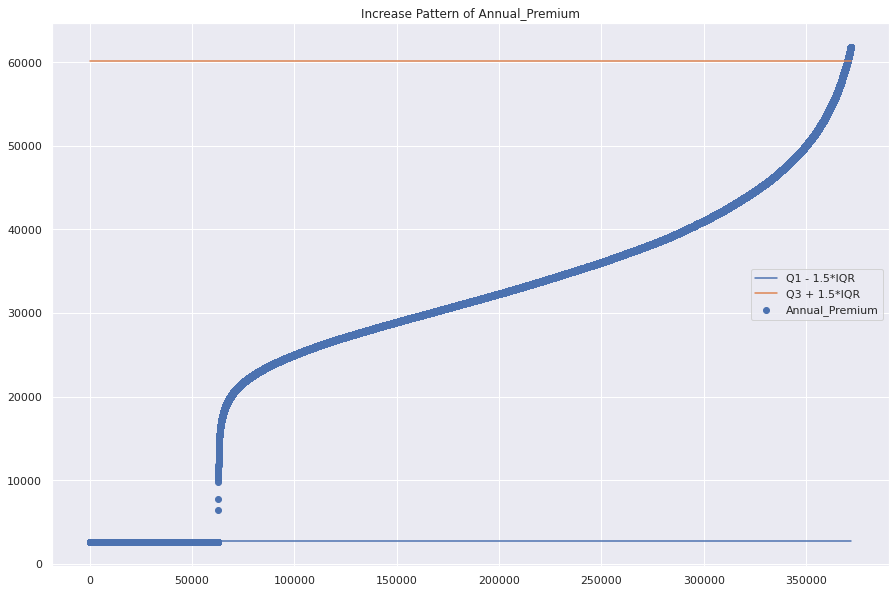

In [ ]:
q1 = np.quantile(data.Annual_Premium, 0.25)
q3 = np.quantile(data.Annual_Premium, 0.75)
iqr = q3 - q1

ap_Sorted = data.Annual_Premium.sort_values(ascending = True)
x = range(0, len(ap_Sorted))

plt.figure(figsize = (15,10))
plt.plot([0, len(ap_Sorted)], [q1 - 1.5*iqr, q1 - 1.5*iqr])
plt.plot([0, len(ap_Sorted)], [q3 + 1.5*iqr, q3 + 1.5*iqr])
plt.scatter(x, ap_Sorted)
plt.legend(["Q1 - 1.5*IQR", "Q3 + 1.5*IQR", "Annual_Premium"])
plt.title("Increase Pattern of Annual_Premium")
plt.show()

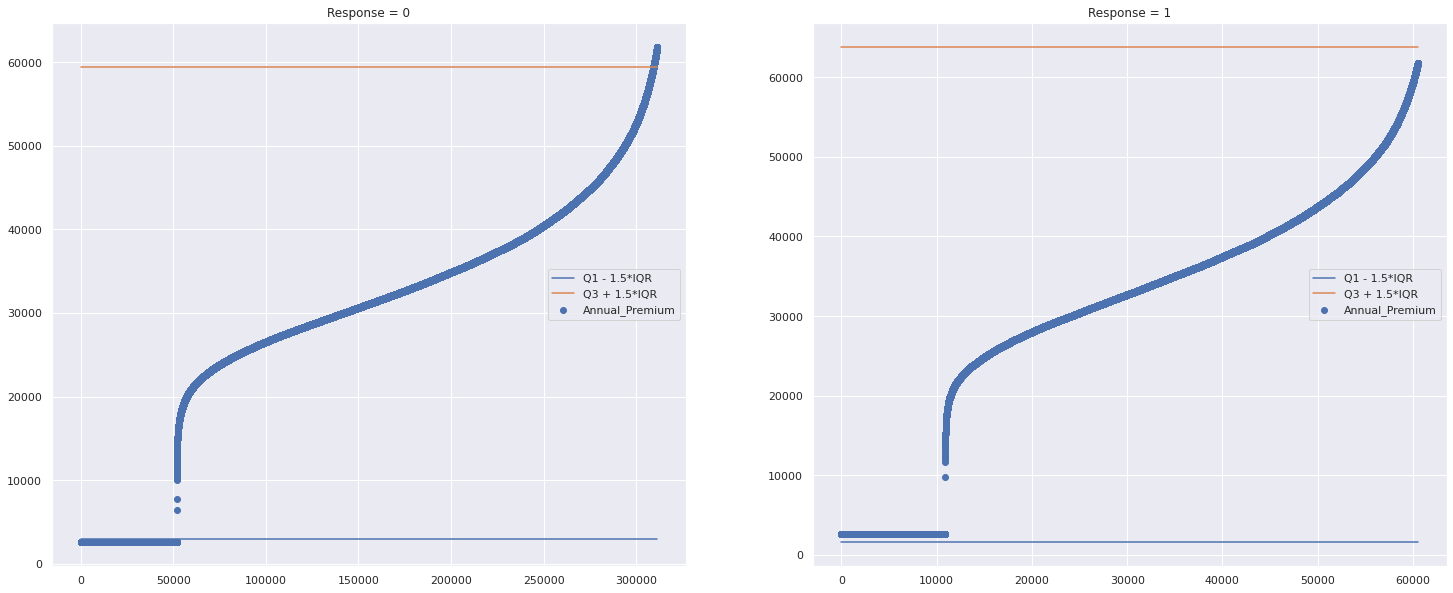

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (25,10))

q1_0 = np.quantile(data[data.Response == 0]["Annual_Premium"], 0.25)
q3_0 = np.quantile(data[data.Response == 0]["Annual_Premium"], 0.75)
iqr_0 = q3_0 - q1_0

ap_Sorted_0 = data[data.Response == 0]["Annual_Premium"].sort_values(ascending = True)

x_0 = range(0, len(ap_Sorted_0))

ax[0].plot([0, len(ap_Sorted_0)], [q1_0 - 1.5 * iqr_0, q1_0 - 1.5 * iqr_0])
ax[0].plot([0, len(ap_Sorted_0)], [q3_0 + 1.5 * iqr_0, q3_0 + 1.5 * iqr_0])
ax[0].scatter(x_0, ap_Sorted_0)
ax[0].legend(["Q1 - 1.5*IQR", "Q3 + 1.5*IQR", "Annual_Premium"])
ax[0].set_title("Response = 0")

################################################################################
q1_1 = np.quantile(data[data.Response == 1]["Annual_Premium"], 0.25)
q3_1 = np.quantile(data[data.Response == 1]["Annual_Premium"], 0.75)
iqr_1 = q3_1 - q1_1

ap_Sorted_1 = data[data.Response == 1]["Annual_Premium"].sort_values(ascending = True)

x_1 = range(0, len(ap_Sorted_1))

ax[1].plot([0, len(ap_Sorted_1)], [q1_1 - 1.5 * iqr_1, q1_1 - 1.5 * iqr_1])
ax[1].plot([0, len(ap_Sorted_1)], [q3_1 + 1.5 * iqr_1, q3_1 + 1.5 * iqr_1])
ax[1].scatter(x_1, ap_Sorted_1)
ax[1].legend(["Q1 - 1.5*IQR", "Q3 + 1.5*IQR", "Annual_Premium"])
ax[1].set_title("Response = 1")

plt.show()

In [ ]:
boundary = np.where(ap_Sorted > 2630)[0][0]
ap_Sorted[boundary - 3 : boundary + 7]

371117     2630.0
9444       2630.0
372136     2630.0
9524       6466.0
301343     7670.0
178887     9816.0
375144    10004.0
315331    10148.0
66101     10328.0
296126    10576.0
Name: Annual_Premium, dtype: float64

### Annual_Premium == 2630

In [ ]:
ap_2630 = data[data.Annual_Premium == 2630]
ap_2630.shape[0]      #62876 observations

62876

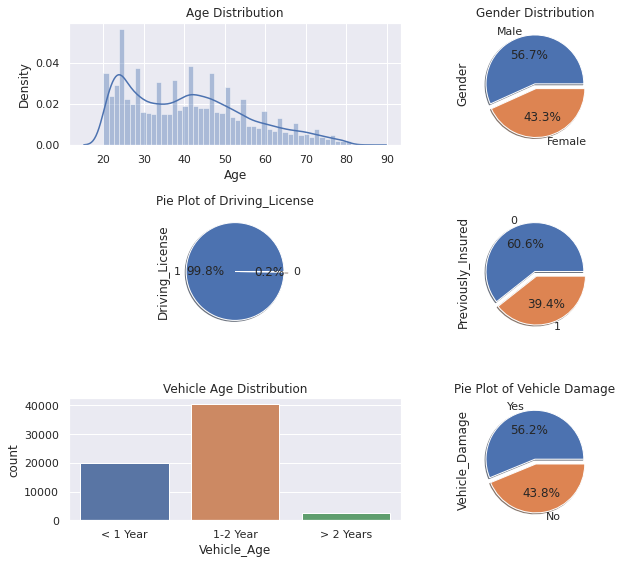

In [ ]:
f, ax = plt.subplots(3, 2, figsize = (12,20))

sns.distplot(ap_2630.Age, ax = ax[0,0])
ax[0,0].set_title('Age Distribution')

ap_2630.Gender.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", shadow = True, ax = ax[0,1])   
ax[0,1].set_title("Gender Distribution")

ap_2630.Driving_License.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", shadow = True, ax = ax[1,0])
ax[1,0].set_title("Pie Plot of Driving_License")

ap_2630.Previously_Insured.value_counts().plot.pie(explode = [0, 0.1], figsize = (10, 8), autopct = "%1.1f%%", shadow = True, ax = ax[1,1])
plt.title("Pie Plot of Previous Insurance")

sns.countplot(x = "Vehicle_Age", data = ap_2630, ax = ax[2,0])
ax[2,0].set_title("Vehicle Age Distribution")

ap_2630.Vehicle_Damage.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", figsize = (10,8), shadow = True, ax = ax[2,1])
ax[2,1].set_title("Pie Plot of Vehicle Damage")

plt.tight_layout()
plt.show()

### Annual_Premium > 2630

In [ ]:
ap_2630up = data[data.Annual_Premium > 2630]

In [ ]:
ap_2630up.Annual_Premium.describe()

count    308871.000000
mean      34866.201330
std        9013.380501
min        6466.000000
25%       28236.000000
50%       33553.000000
75%       40362.000000
max       61800.000000
Name: Annual_Premium, dtype: float64

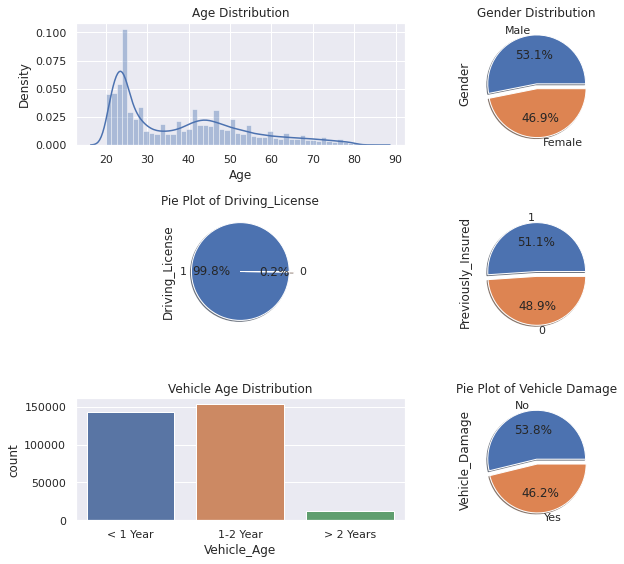

In [ ]:
f, ax = plt.subplots(3, 2, figsize = (12,20))

sns.distplot(ap_2630up.Age, ax = ax[0,0])
ax[0,0].set_title('Age Distribution')

ap_2630up.Gender.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", shadow = True, ax = ax[0,1])   #성별 분포
ax[0,1].set_title("Gender Distribution")

ap_2630up.Driving_License.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", shadow = True, ax = ax[1,0])
ax[1,0].set_title("Pie Plot of Driving_License")

ap_2630up.Previously_Insured.value_counts().plot.pie(explode = [0, 0.1], figsize = (10, 8), autopct = "%1.1f%%", shadow = True, ax = ax[1,1])
plt.title("Pie Plot of Previous Insurance")

sns.countplot(x = "Vehicle_Age", data = ap_2630up, order = ['< 1 Year', '1-2 Year', '> 2 Years'], ax = ax[2,0])
ax[2,0].set_title("Vehicle Age Distribution")

ap_2630up.Vehicle_Damage.value_counts().plot.pie(explode = [0, 0.1], autopct = "%1.1f%%", figsize = (10,8), shadow = True, ax = ax[2,1])
ax[2,1].set_title("Pie Plot of Vehicle Damage")

plt.tight_layout()
plt.show()

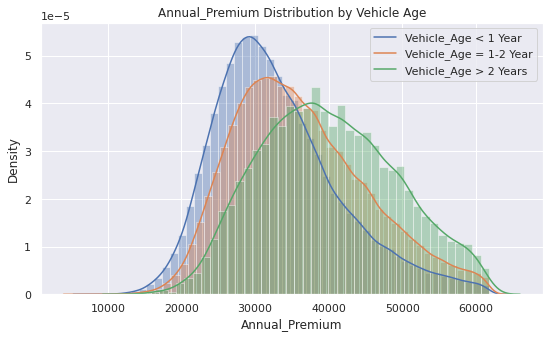

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.distplot(ap_2630up[ap_2630up.Vehicle_Age == "< 1 Year"]["Annual_Premium"], ax = ax)
sns.distplot(ap_2630up[ap_2630up.Vehicle_Age == "1-2 Year"]["Annual_Premium"], ax = ax)
sns.distplot(ap_2630up[ap_2630up.Vehicle_Age == "> 2 Years"]["Annual_Premium"], ax = ax)
plt.legend(["Vehicle_Age < 1 Year", "Vehicle_Age = 1-2 Year", "Vehicle_Age > 2 Years"])
plt.title("Annual_Premium Distribution by Vehicle Age")
plt.show()

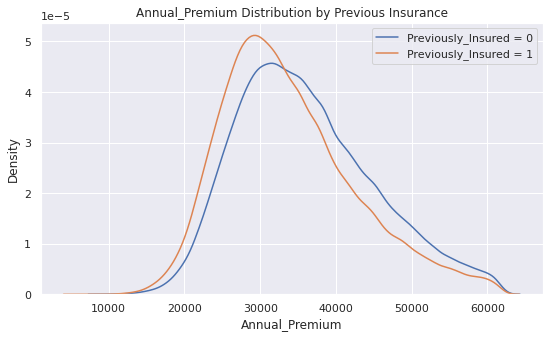

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.kdeplot(ap_2630up[ap_2630up.Previously_Insured == 0]["Annual_Premium"], ax = ax)
sns.kdeplot(ap_2630up[ap_2630up.Previously_Insured == 1]["Annual_Premium"], ax = ax)
plt.legend(["Previously_Insured = 0", "Previously_Insured = 1"])
plt.title("Annual_Premium Distribution by Previous Insurance")
plt.show()

## Policy_Sales_Channel (Nominal)

In [ ]:
data.Policy_Sales_Channel.nunique()

156

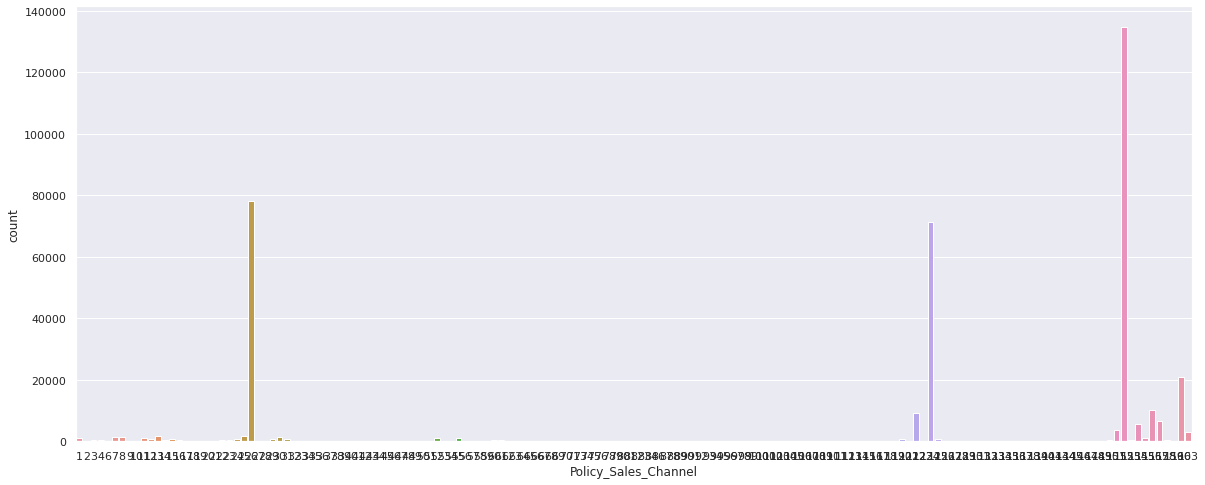

In [ ]:
plt.figure(figsize = (20,8))
sns.countplot(x = data.Policy_Sales_Channel.astype(int))
plt.show()

In [ ]:
gb = data.loc[:, ["Policy_Sales_Channel", "Response"]].astype(int).groupby("Policy_Sales_Channel").agg(["size", "mean"])
gb = gb.sort_values(by = ("Response", "size"), ascending = False)
np.mean(gb[("Response", "size")])

2382.99358974359

In [ ]:
channel_analysis = pd.DataFrame({
    "Count" : gb[("Response", "size")], 
    "Ratio(%)" : 100 * gb[("Response", "size")] / data.shape[0],
    "Accuracy(%)" : 100 * gb[("Response", "mean")],
    "Accuracy_Count" : (gb[("Response", "size")] * gb[("Response", "mean")]).astype(int)
    })
channel_analysis.head(15)

,Count,Ratio(%),Accuracy(%),Accuracy_Count
Policy_Sales_Channel,,,,
152,134675,36.227596,2.330054,3138
26,78212,21.039040,27.986754,21888
124,71263,19.169758,26.608478,18962
160,20757,5.583636,1.902972,395
156,10040,2.700762,30.806773,3093
122,9127,2.455164,23.523611,2147
157,6701,1.802570,39.262797,2631
154,5773,1.552938,36.618742,2114
151,3686,0.991535,2.794357,103


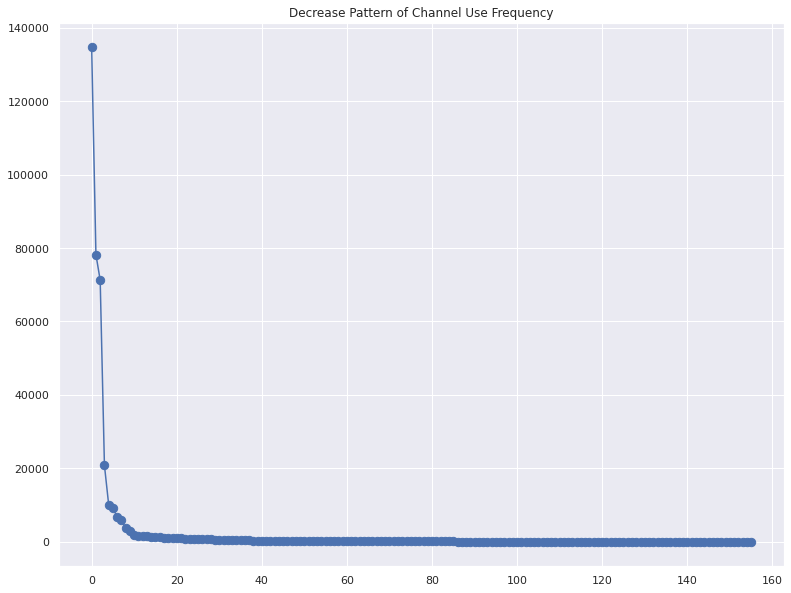

In [ ]:
plt.figure(figsize = (13,10))
plt.scatter(range(len(channel_analysis.Count)), channel_analysis.Count, s = 70)   
plt.plot(range(len(channel_analysis.Count)), channel_analysis.Count)              
plt.title("Decrease Pattern of Channel Use Frequency")
plt.show()

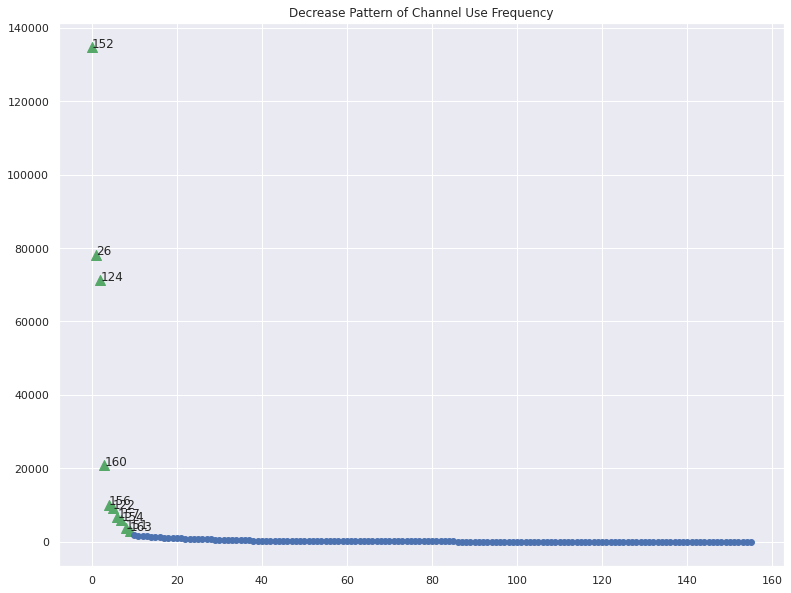

In [ ]:
plt.figure(figsize = (13,10))
plt.scatter(range(10), channel_analysis.Count[0:10], s = 100, marker = "^", color = "g")
plt.scatter(range(10, len(channel_analysis.Count)), channel_analysis.Count[10:], s = 35)
for i, txt in enumerate(channel_analysis.index[0:10]):
  plt.annotate(txt, (range(10)[i], channel_analysis.Count.iloc[i]))   #Adding annotations for each markers
plt.title("Decrease Pattern of Channel Use Frequency")
plt.show()

In [ ]:
#Using only top 10 channels at Policy_Sales_Channel
data.Policy_Sales_Channel = data.Policy_Sales_Channel.astype(int)
channel = pd.DataFrame()
for num in channel_analysis.index[:10]:
  match = data[data.Policy_Sales_Channel == num]
  channel = pd.concat([channel, match], axis = 0)

channel.shape

(343171, 12)

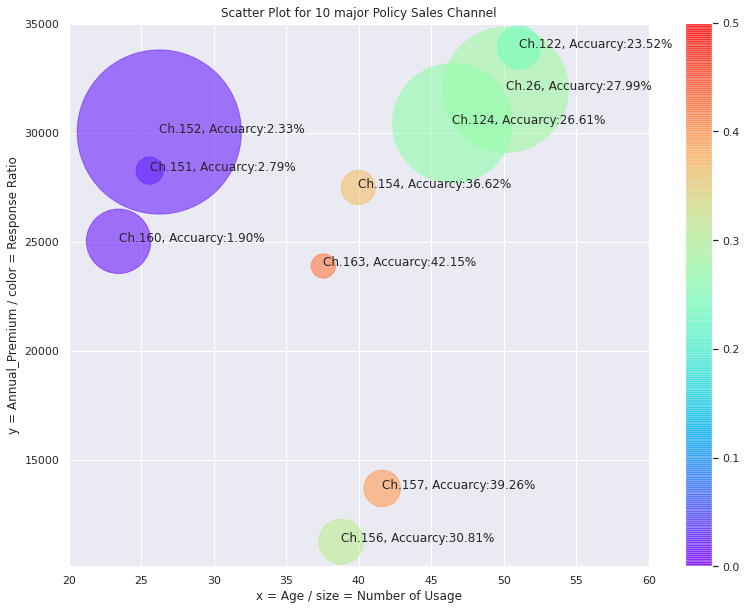

In [ ]:
df = channel.loc[:, ["Age", "Policy_Sales_Channel", "Annual_Premium", "Response"]]  

agg = pd.concat([df.groupby("Policy_Sales_Channel").mean(), df.groupby("Policy_Sales_Channel").size()], axis = 1) 
agg.columns = ["Age", "Annual_Premium", "Response", "Size"]

#####################################################################################
# Visualization
plt.figure(figsize = (13,10))

plt.scatter(x = agg.Age, 
            y = agg.Annual_Premium, 
            alpha = 0.6, 
            s = 0.2 * agg.Size, 
            c = agg.Response, 
            cmap = "rainbow", 
            vmin = 0, 
            vmax = 0.5
            )
plt.colorbar()
plt.xlim(20,60)
plt.xlabel("x = Age / size = Number of Usage")
plt.ylabel("y = Annual_Premium / color = Response Ratio")
plt.title("Scatter Plot for 10 major Policy Sales Channel")
for i, txt in enumerate(agg.index):
  plt.annotate("Ch.{}, Accuarcy:{:.2f}%".format(txt, agg.Response.iloc[i] * 100),
               (agg.Age.iloc[i], agg.Annual_Premium.iloc[i])
               )   #Adding annotations for each markers

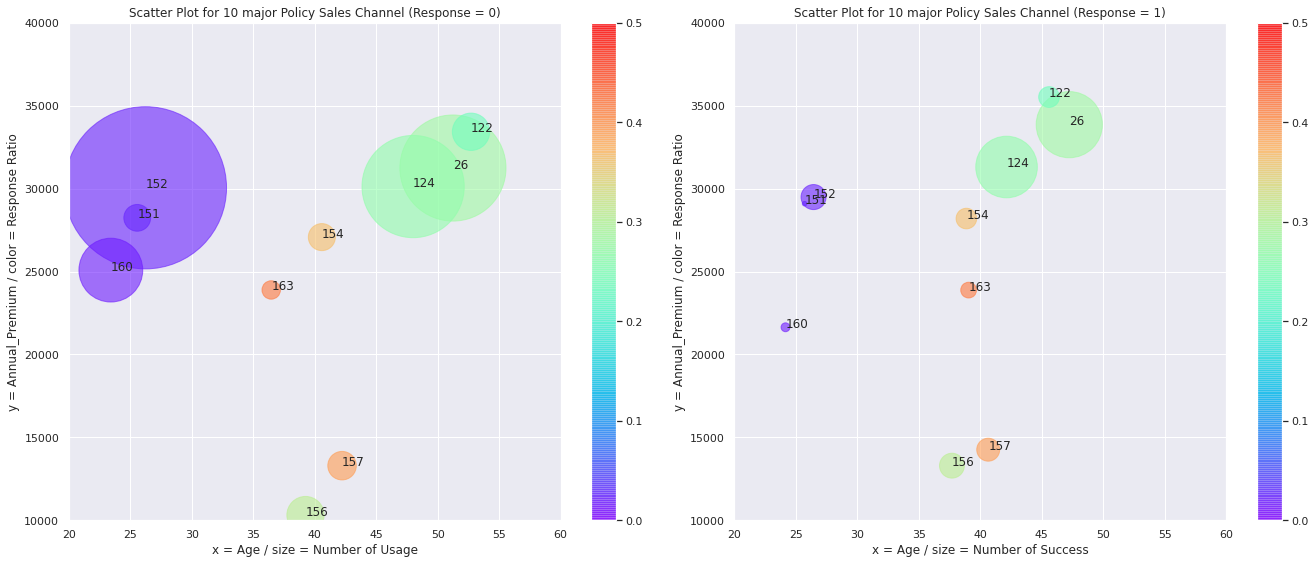

In [ ]:
df = channel.loc[:, ["Age", "Policy_Sales_Channel", "Annual_Premium", "Response"]]  

df_0 = df[df.Response == 0]   
df_1 = df[df.Response == 1]   

agg_0 = pd.concat([df_0.groupby("Policy_Sales_Channel").mean(), df_0.groupby("Policy_Sales_Channel").size()], axis = 1)  
agg_0.columns = ["Age", "Annual_Premium", "Response", "Size"]

agg_1 = pd.concat([df_1.groupby("Policy_Sales_Channel").mean(), df_1.groupby("Policy_Sales_Channel").size()], axis = 1)  
agg_1.columns = ["Age", "Annual_Premium", "Response", "Size"]

#####################################################################################
# Visualization
f, ax = plt.subplots(1, 2, figsize = (19,8))

s1 = ax[0].scatter(x = agg_0.Age, 
                   y = agg_0.Annual_Premium, 
                   alpha = 0.6, 
                   s = 0.2 * agg_0.Size,
                   c = agg.Response,
                   cmap = "rainbow",
                   vmin = 0,
                   vmax = 0.5 
                   )
plt.colorbar(s1, ax = ax[0])
ax[0].set_xlim(20,60)
ax[0].set_ylim(10000,40000)
ax[0].set_xlabel("x = Age / size = Number of Usage")
ax[0].set_ylabel("y = Annual_Premium / color = Response Ratio")
ax[0].set_title("Scatter Plot for 10 major Policy Sales Channel (Response = 0)")
for i, txt in enumerate(agg_0.index):
  ax[0].annotate(txt, (agg_0.Age.iloc[i], agg_0.Annual_Premium.iloc[i]))   #Adding annotations for each markers

s2 = ax[1].scatter(x = agg_1.Age, 
                   y = agg_1.Annual_Premium, 
                   alpha = 0.6, 
                   s = 0.2 * agg_1.Size,
                   c = agg.Response,
                   cmap = "rainbow",
                   vmin = 0,
                   vmax = 0.5 
                   )
plt.colorbar(s2, ax = ax[1])
ax[1].set_xlim(20,60)
ax[1].set_ylim(10000,40000)
ax[1].set_xlabel("x = Age / size = Number of Success")
ax[1].set_ylabel("y = Annual_Premium / color = Response Ratio")
ax[1].set_title("Scatter Plot for 10 major Policy Sales Channel (Response = 1)")
for j, txt in enumerate(agg_1.index):
  ax[1].annotate(txt, (agg_1.Age.iloc[j], agg_1.Annual_Premium.iloc[j]))   #Adding annotations for each markers

plt.tight_layout()
plt.show()

## Vintage (Interval)

In [ ]:
data.Vintage.describe()

count    371747.000000
mean        154.194495
std          83.733577
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

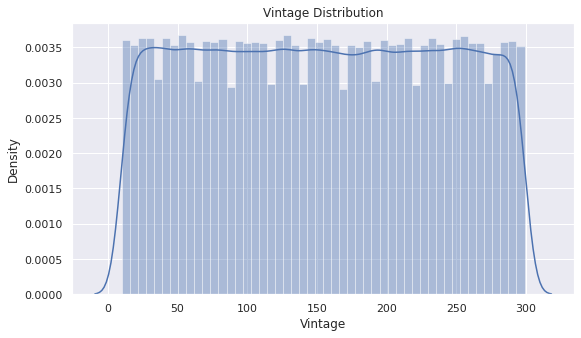

In [ ]:
plt.figure(figsize = (9,5))
sns.distplot(data['Vintage'])
plt.title("Vintage Distribution")
plt.show()

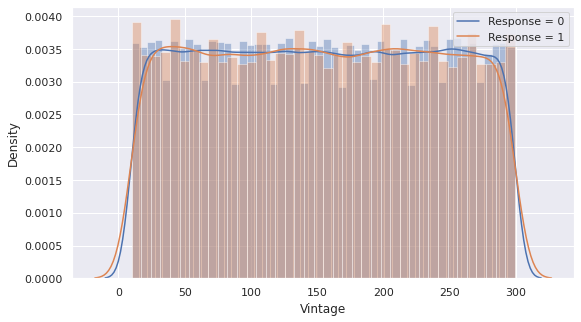

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.distplot(data[data.Response == 0]["Vintage"], ax = ax)
sns.distplot(data[data.Response == 1]["Vintage"], ax = ax)
plt.legend(["Response = 0", "Response = 1"])
plt.show()

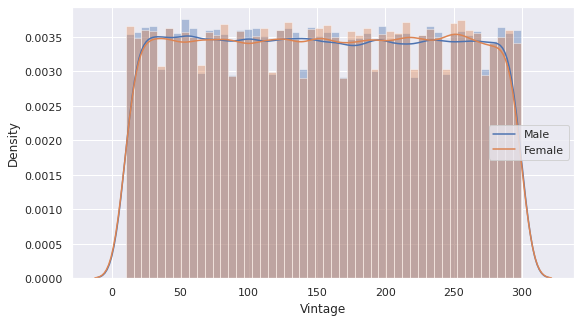

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.distplot(data[data.Gender == "Male"]["Vintage"], ax = ax)
sns.distplot(data[data.Gender == "Female"]["Vintage"], ax = ax)
plt.legend(["Male", "Female"])
plt.show()

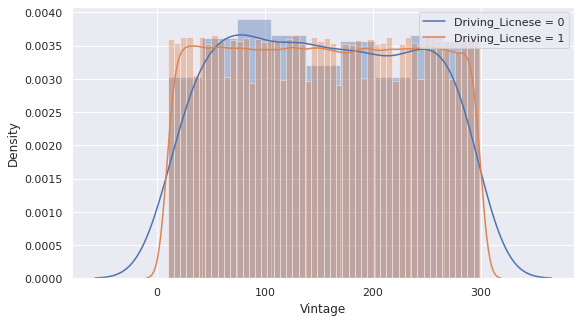

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.distplot(data[data.Driving_License == 0]["Vintage"], ax = ax)
sns.distplot(data[data.Driving_License == 1]["Vintage"], ax = ax)
plt.legend(["Driving_Licnese = 0", "Driving_Licnese = 1"])
plt.show()

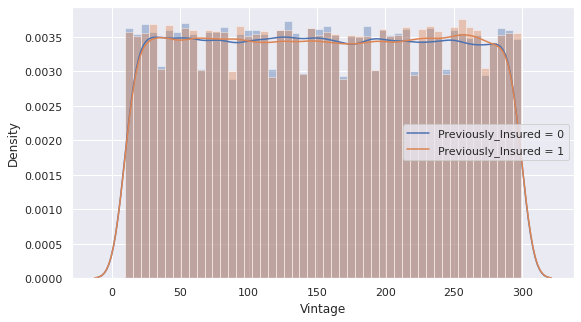

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.distplot(data[data.Previously_Insured == 0]["Vintage"], ax = ax)
sns.distplot(data[data.Previously_Insured == 1]["Vintage"], ax = ax)
plt.legend(["Previously_Insured = 0", "Previously_Insured = 1"])
plt.show()

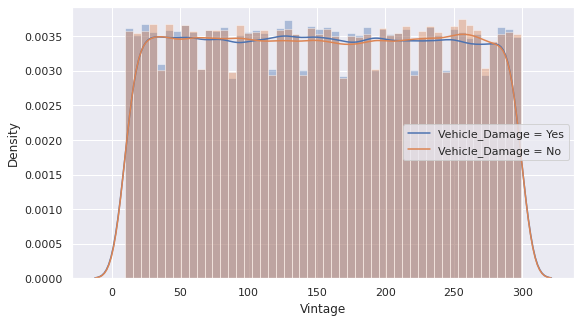

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (9,5))
sns.distplot(data[data.Vehicle_Damage == "Yes"]["Vintage"], ax = ax)
sns.distplot(data[data.Vehicle_Damage == "No"]["Vintage"], ax = ax)
plt.legend(["Vehicle_Damage = Yes", "Vehicle_Damage = No"])
plt.show()

# Feature Engineering

1. Changing the dtype from object into int64

In [ ]:
#Gender
data.loc[data.Gender == "Male", "Gender"] = 1
data.loc[data.Gender == "Female", "Gender"] = 0
data.Gender = data.Gender.astype(int)
meta.loc["Gender", "dtype"] = data.Gender.dtype   #Update metadata

#Vehicle_Age
data.loc[data.Vehicle_Age == "< 1 Year", "Vehicle_Age"] = 0
data.loc[data.Vehicle_Age == "1-2 Year", "Vehicle_Age"] = 1
data.loc[data.Vehicle_Age == "> 2 Years", "Vehicle_Age"] = 2
data.Vehicle_Age = data.Vehicle_Age.astype(int)
meta.loc["Vehicle_Age", "dtype"] = data.Vehicle_Age.dtype   #Update metadata

#Vehicle_Damage
data.loc[data.Vehicle_Damage == "No" , "Vehicle_Damage"] = 0
data.loc[data.Vehicle_Damage == "Yes" , "Vehicle_Damage"] = 1
data.Vehicle_Damage = data.Vehicle_Damage.astype(int)
meta.loc["Vehicle_Damage", "dtype"] = data.Vehicle_Damage.dtype   #Update metadata

meta

,role,keep,dtype,level
varname,,,,
id,id,True,int64,nominal
Gender,input,True,int64,binary
Age,input,True,int64,interval
Driving_License,input,True,int64,binary
Region_Code,input,True,float64,nominal
Previously_Insured,input,True,int64,binary
Vehicle_Age,input,True,int64,ordinal
Vehicle_Damage,input,True,int64,binary
Annual_Premium,input,True,float64,interval


2. Changing unnecessary float64 variables into int64

In [ ]:
data.Region_Code = data.Region_Code.astype(int)
meta.loc["Region_Code", "dtype"] = data.Region_Code.dtype     #Update Metadata

data.Policy_Sales_Channel = data.Policy_Sales_Channel.astype(int)
meta.loc["Policy_Sales_Channel", "dtype"] = data.Policy_Sales_Channel.dtype   #Update Metadata

meta

,role,keep,dtype,level
varname,,,,
id,id,True,int64,nominal
Gender,input,True,int64,binary
Age,input,True,int64,interval
Driving_License,input,True,int64,binary
Region_Code,input,True,int64,nominal
Previously_Insured,input,True,int64,binary
Vehicle_Age,input,True,int64,ordinal
Vehicle_Damage,input,True,int64,binary
Annual_Premium,input,True,float64,interval


3. Removing unnecessary variables (Nominal Variables)

In [ ]:
data.drop("id", axis = 1, inplace = True)
meta.loc["id", "keep"] = False        #Update Metadata

data.drop("Region_Code", axis = 1, inplace = True)
meta.loc["Region_Code", "keep"] = False        #Update Metadata

data.drop("Policy_Sales_Channel", axis = 1, inplace = True)
meta.loc["Policy_Sales_Channel", "keep"] = False        #Update Metadata

data = data[data.Driving_License == 1]        #Removing Minority Values at Driving_License
data.drop("Driving_License", axis = 1, inplace = True)
meta.loc["Driving_License", "keep"] = False        #Update Metadata

meta

,role,keep,dtype,level
varname,,,,
id,id,False,int64,nominal
Gender,input,True,int64,binary
Age,input,True,int64,interval
Driving_License,input,False,int64,binary
Region_Code,input,False,int64,nominal
Previously_Insured,input,True,int64,binary
Vehicle_Age,input,True,int64,ordinal
Vehicle_Damage,input,True,int64,binary
Annual_Premium,input,True,float64,interval


4. Changing interval variables into ordinal variables

In [ ]:
data["Age_range"] = pd.qcut(data.Age, 5, labels = [0, 1, 2, 3, 4])
data["Annual_Premium_range"] = pd.qcut(data.Annual_Premium, 5, labels = [0, 1, 2, 3, 4])
data["Vintage_range"] = pd.qcut(data.Vintage, 5, labels = [0, 1, 2, 3, 4])

data.Age_range = data.Age_range.astype(int)
data.Annual_Premium_range = data.Annual_Premium_range.astype(int)
data.Vintage_range = data.Vintage_range.astype(int)

data.drop("Age", axis = 1, inplace = True)
data.drop("Annual_Premium", axis = 1, inplace = True)
data.drop("Vintage", axis = 1, inplace = True)

#Updata metadata
meta.loc["Age", "level"] = "ordinal"
meta.loc["Annual_Premium", "level"] = "ordinal"
meta.loc["Annual_Premium", "dtype"] = data.Annual_Premium_range.dtype
meta.loc["Vintage", "level"] = "ordinal"

meta

,role,keep,dtype,level
varname,,,,
id,id,False,int64,nominal
Gender,input,True,int64,binary
Age,input,True,int64,ordinal
Driving_License,input,False,int64,binary
Region_Code,input,False,int64,nominal
Previously_Insured,input,True,int64,binary
Vehicle_Age,input,True,int64,ordinal
Vehicle_Damage,input,True,int64,binary
Annual_Premium,input,True,int64,ordinal


In [ ]:
data.shape

(371065, 8)

# Finding Tendency

At this point, I am going to find tendencies between numeric variables by analysing nominal variables

In [ ]:
tendency = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Stat_Competition/archive/aug_train.csv")
tendency.Region_Code = tendency.Region_Code.astype(int)     #Analysis at Region_Code
region = pd.DataFrame()
for num in region_analysis_c.index[:10]:                    #Using only top 10 Region_Code
  match = tendency[tendency.Region_Code == num]
  region = pd.concat([region, match], axis = 0)

region.drop(["id", "Policy_Sales_Channel"], axis = 1, inplace = True)

region.loc[region.Gender == "Male", "Gender"] = 1
region.loc[region.Gender == "Female", "Gender"] = 0
region.Gender = region.Gender.astype(int)

region.loc[region.Vehicle_Age == "< 1 Year", "Vehicle_Age"] = 0
region.loc[region.Vehicle_Age == "1-2 Year", "Vehicle_Age"] = 1
region.loc[region.Vehicle_Age == "> 2 Years", "Vehicle_Age"] = 2
region.Vehicle_Age = region.Vehicle_Age.astype(int)

#Vehicle_Damage
region.loc[region.Vehicle_Damage == "No" , "Vehicle_Damage"] = 0
region.loc[region.Vehicle_Damage == "Yes" , "Vehicle_Damage"] = 1
region.Vehicle_Damage = region.Vehicle_Damage.astype(int)

overall = pd.concat([region.groupby("Region_Code").size(), region.groupby("Region_Code").mean()], axis = 1)
cols = list(overall.columns) ; cols[0] = "Count" ; overall.columns = cols
overall_region = overall.sort_values(by = "Count", ascending = False) ; overall_region

,Count,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
Region_Code,,,,,,,,,,
28,107199,0.564455,45.802610,0.997229,0.324070,0.914775,0.652329,38714.468223,154.230767,0.262922
8,33941,0.563389,38.191332,0.997879,0.541440,0.571993,0.427801,36690.820070,155.046168,0.127810
46,20203,0.539474,36.762214,0.998664,0.559917,0.536257,0.417265,27206.619066,154.316092,0.133941
41,19090,0.529649,36.170037,0.998271,0.590571,0.498114,0.394814,31049.881613,154.886642,0.159874
15,13071,0.491164,32.617244,0.998470,0.522454,0.363017,0.406090,29568.585648,154.604850,0.090276
30,12742,0.500000,31.716842,0.999451,0.708288,0.331424,0.283707,25685.847512,152.812510,0.091273
29,11650,0.531931,35.833991,0.997940,0.607210,0.497682,0.370730,29479.712189,152.348155,0.171073
50,10176,0.531250,37.434748,0.998526,0.607213,0.504914,0.360456,31024.676985,153.065939,0.065252
11,9392,0.492440,34.037798,0.999148,0.632773,0.414821,0.349446,27736.605302,154.037798,0.147998


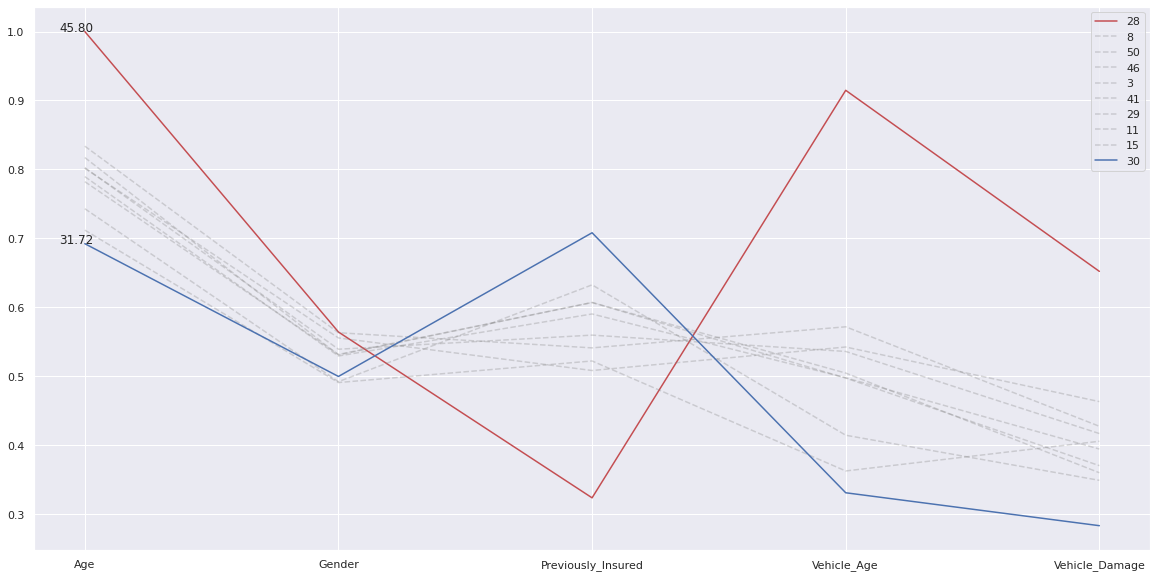

In [ ]:
copy = overall_region.loc[:,"Gender":"Vehicle_Damage"].sort_values(by = "Age", ascending = False)
copy = copy[["Age", "Gender", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]]

age_max = np.max(copy["Age"])         #Maximum value of Age
copy["Age"] = copy['Age'] / age_max   #Age : Ratio compared with the maximum value

####################################
#Visualization of the analysis above
plt.figure(figsize = (20,10))

plt.plot(range(5), copy.iloc[0,:], c = "r")
for l in range(1,9):
  plt.plot(range(5), copy.iloc[l,:], c = "gray", linestyle = "--", alpha = 0.3)
plt.plot(range(5), copy.iloc[9,:], c = "b")

for c in copy.index[[0,9]]:
  plt.annotate("{:.2f}".format(overall_region.loc[c, "Age"]), (-0.1, copy.loc[c,"Age"]))

plt.xticks(range(5), copy.columns)
plt.legend(copy.index)
plt.show()

In [ ]:
tendency.Policy_Sales_Channel = tendency.Policy_Sales_Channel.astype(int) #Analysis at Policy_Sales_Channel
channel = pd.DataFrame()
for num in channel_analysis.index[:10]:        #Using top 10 Policy_Sales_Channel
  match = tendency[tendency.Policy_Sales_Channel == num]
  channel = pd.concat([channel, match], axis = 0)

channel.drop(["id", "Region_Code"], axis = 1, inplace = True)

channel.loc[channel.Gender == "Male", "Gender"] = 1
channel.loc[channel.Gender == "Female", "Gender"] = 0
channel.Gender = channel.Gender.astype(int)

channel.loc[channel.Vehicle_Age == "< 1 Year", "Vehicle_Age"] = 0
channel.loc[channel.Vehicle_Age == "1-2 Year", "Vehicle_Age"] = 1
channel.loc[channel.Vehicle_Age == "> 2 Years", "Vehicle_Age"] = 2
channel.Vehicle_Age = channel.Vehicle_Age.astype(int)

#Vehicle_Damage
channel.loc[channel.Vehicle_Damage == "No" , "Vehicle_Damage"] = 0
channel.loc[channel.Vehicle_Damage == "Yes" , "Vehicle_Damage"] = 1
channel.Vehicle_Damage = channel.Vehicle_Damage.astype(int)

overall = pd.concat([channel.groupby("Policy_Sales_Channel").size(), channel.groupby("Policy_Sales_Channel").mean()], axis = 1)
cols = list(overall.columns) ; cols[0] = "Count" ; overall.columns = cols
overall_channel = overall.sort_values(by = "Count", ascending = False) ; overall_channel

,Count,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
Policy_Sales_Channel,,,,,,,,,,
152,137422,0.429844,26.239721,0.999956,0.780508,0.067034,0.183908,30991.166444,154.361601,0.023170
26,81566,0.616715,50.234509,0.995635,0.314898,1.028259,0.666981,33798.601881,154.456183,0.282115
124,73315,0.644970,46.499489,0.997627,0.293241,1.006083,0.676315,31743.202933,154.167074,0.265253
160,21045,0.463388,23.421430,1.000000,0.602566,0.052744,0.379853,25732.552910,153.589166,0.018959
156,10106,0.571641,38.754799,0.999802,0.117653,0.885415,0.855432,11755.412527,154.065110,0.308431
122,9745,0.537609,51.188404,0.994253,0.284864,1.073679,0.679117,36717.609441,152.718420,0.235095
157,6739,0.555720,41.592076,0.999852,0.085176,1.014987,0.891824,14038.276599,154.682891,0.393233
154,5883,0.611423,40.001700,0.999490,0.133265,0.908550,0.839368,28433.555159,153.997450,0.365290
151,3760,0.402926,25.606383,1.000000,0.670479,0.052128,0.258511,29189.035904,153.105851,0.027660


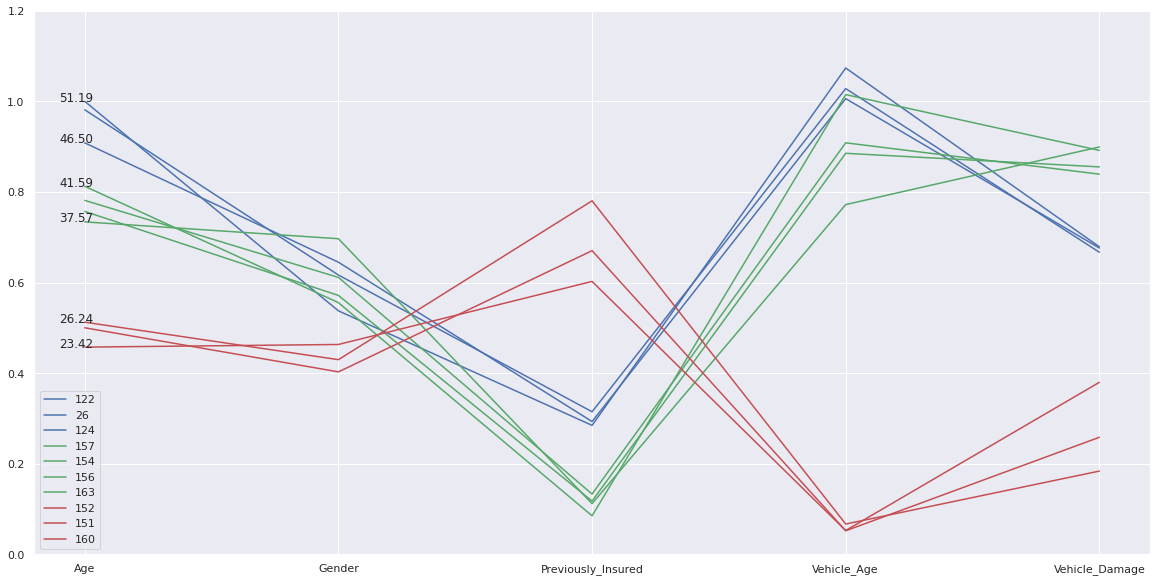

In [ ]:
copy = overall_channel.loc[:,"Gender":"Vehicle_Damage"].sort_values(by = "Age", ascending = False)
copy = copy[["Age", "Gender", "Previously_Insured", "Vehicle_Age", "Vehicle_Damage"]]

age_max = np.max(copy["Age"])         #Maximum value of Age
copy["Age"] = copy['Age'] / age_max   #Age : Ratio compared with the maximum value

###############################
#Visualization of the analysis above
plt.figure(figsize = (20,10))

for l in range(3):
  plt.plot(range(5), copy.iloc[l,:], c = "b")
for l in range(3,7):
  plt.plot(range(5), copy.iloc[l,:], c = "g")
for l in range(7,10):
  plt.plot(range(5), copy.iloc[l,:], c = "r")

for c in copy.index[[0,2,3,6,7,9]]:
  plt.annotate("{:.2f}".format(overall_channel.loc[c, "Age"]), (-0.1, copy.loc[c,"Age"]))

plt.ylim(0,1.2)
plt.xticks(range(5), copy.columns)
plt.legend(copy.index)

plt.show()

# Heatmap

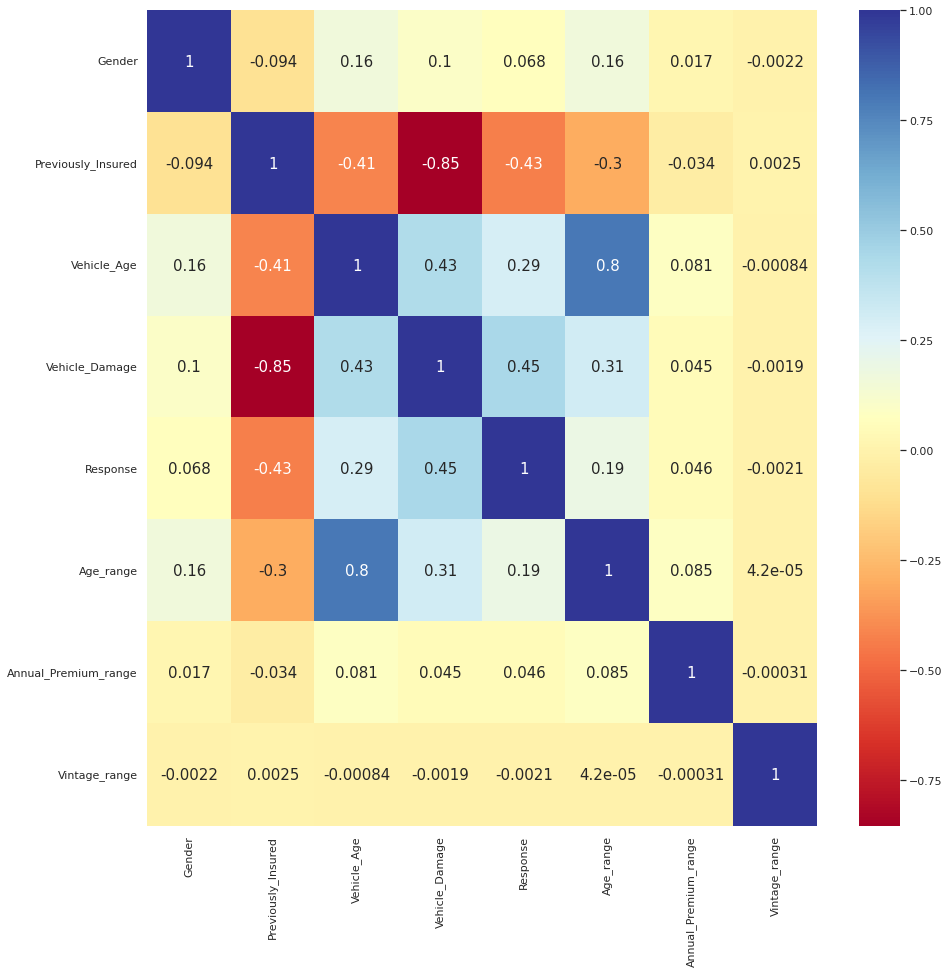

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlBu', annot_kws={"size": 15})
plt.show()

# Modeling


## Train/Test Split

In [ ]:
Input = data.drop(['Response'],axis = 1)
target = data['Response']

train_input, test_input, train_target, test_target = train_test_split(Input, target, test_size = 0.3, random_state = 0)

print("Train Input Data Shape : {}, Test Input Data Shape : {}".format(train_input.shape, test_input.shape))
print("Train Target Data Shape : {}, Test Targett Data Shape : {}".format(train_target.shape, test_target.shape))

Train Input Data Shape : (259745, 7), Test Input Data Shape : (111320, 7)
Train Target Data Shape : (259745,), Test Targett Data Shape : (111320,)


## Training Classifier Model

Using Random Forest Classifier, without handling the target data imbalance

In [ ]:
rf = RandomForestClassifier()
rf.fit(train_input, train_target)
prediction = rf.predict(test_input)
print('Accuracy for Random Forest is :', metrics.accuracy_score(test_target, prediction))
print('Recall for Random Forest is :', metrics.recall_score(test_target, prediction))
print("Precision for Random Forest is:", metrics.precision_score(test_target, prediction))
print("F1 Score for Random Forest is :", metrics.f1_score(test_target, prediction))

#Poor Recall/Precision/F1 Scores

Accuracy for Random Forest is : 0.8366780452748832
Recall for Random Forest is : 0.20600220264317182
Precision for Random Forest is: 0.4986005597760896
F1 Score for Random Forest is : 0.29154814324124223


# Imbalanced Dataset Solution Method

### Response(Target Data) Ratio of Train Data

In [ ]:
train_data = pd.concat([train_input, train_target], axis = 1)

print("The number of Response 0 = ",len(train_data.loc[train_data['Response'] == 0]))
print("The number of Response 1 = ",len(train_data.loc[train_data['Response'] == 1]))

The number of Response 0 =  217417
The number of Response 1 =  42328


# i) UnderSamping

## RandomUnderSampler

Taking a look at scores by changing the ratio of Response values (Increasing the ratio of '0' up to 0.5)

In [ ]:
a=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5]   #Response value ratio : 0.3 ~ 0.5
accuracy = []
recall = []
precision = []
f1_score = []

for i in a:
    Rd_under=RandomUnderSampler(sampling_strategy=i)
    train_input_res, train_target_res=Rd_under.fit_resample(train_input, train_target)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rf.fit(train_input_res, train_target_res)
    
    accuracy.append(metrics.accuracy_score(test_target, rf.predict(test_input)))
    recall.append(metrics.recall_score(test_target, rf.predict(test_input)))
    precision.append(metrics.precision_score(test_target, rf.predict(test_input)))
    f1_score.append(metrics.f1_score(test_target, rf.predict(test_input)))
    
rdu_score_dataframe = pd.DataFrame({'accuracy' : accuracy, 'recall' : recall, 'precision' : precision,
                                'f1_score': f1_score}, index = a)

rdu_score_dataframe.style.background_gradient(cmap='Wistia')

  0%|          | 0/9 [00:00<?, ?it/s]

,accuracy,recall,precision,f1_score
0.3,0.801159,0.420925,0.396823,0.408519
0.325,0.787522,0.586949,0.397561,0.474039
0.35,0.779779,0.655452,0.394649,0.492664
0.375,0.765379,0.768007,0.389016,0.516441
0.4,0.760636,0.816079,0.388711,0.526596
0.425,0.754420,0.855727,0.386010,0.532028
0.45,0.753692,0.858040,0.385474,0.531963
0.475,0.753216,0.858921,0.385060,0.531738
0.5,0.752533,0.866134,0.385081,0.533132


# ii) Oversampling

## SMOTE

In [ ]:
a=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5]   #Response value ratio : 0.3 ~ 0.5
accuracy=[]
recall=[]
precision=[]
f1_score=[]

for i in a:
    smote=SMOTE(sampling_strategy=i)
    train_input_res, train_target_res=smote.fit_resample(train_input, train_target)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rf.fit(train_input_res, train_target_res)
    
    accuracy.append(metrics.accuracy_score(test_target, rf.predict(test_input)))
    recall.append(metrics.recall_score(test_target, rf.predict(test_input)))
    precision.append(metrics.precision_score(test_target, rf.predict(test_input)))
    f1_score.append(metrics.f1_score(test_target, rf.predict(test_input)))
    
sm_score_dataframe = pd.DataFrame({'accuracy' : accuracy, 'recall' : recall, 'precision' : precision,
                                'f1_score': f1_score}, index=a)

sm_score_dataframe.style.background_gradient(cmap='Wistia')

,accuracy,recall,precision,f1_score
0.3,0.800916,0.428744,0.397773,0.412678
0.325,0.785627,0.596751,0.395829,0.475954
0.35,0.777363,0.676817,0.393867,0.497954
0.375,0.765235,0.780066,0.390183,0.520178
0.4,0.760537,0.814923,0.388476,0.526140
0.425,0.754501,0.854185,0.385938,0.531661
0.45,0.752821,0.862610,0.385022,0.532407
0.475,0.753234,0.860683,0.385260,0.532266
0.5,0.752632,0.863436,0.384908,0.532455


## ADASYN

In [ ]:
a=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5]   #Response value ratio : 0.3 ~ 0.5
accuracy=[]
recall=[]
precision=[]
f1_score=[]

for i in a:
    ada=ADASYN(sampling_strategy = i)
    train_input_res, train_target_res = ada.fit_resample(train_input, train_target)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rf.fit(train_input_res, train_target_res)
    
    accuracy.append(metrics.accuracy_score(test_target, rf.predict(test_input)))
    recall.append(metrics.recall_score(test_target, rf.predict(test_input)))
    precision.append(metrics.precision_score(test_target, rf.predict(test_input)))
    f1_score.append(metrics.f1_score(test_target, rf.predict(test_input)))
    
adasyn_score_dataframe = pd.DataFrame({'accuracy' : accuracy, 'recall' : recall, 'precision' : precision,
                                'f1_score': f1_score}, index=a)

adasyn_score_dataframe.style.background_gradient(cmap='Wistia')

,accuracy,recall,precision,f1_score
0.3,0.782752,0.561674,0.386013,0.457563
0.325,0.782752,0.561674,0.386013,0.457563
0.35,0.782752,0.561674,0.386013,0.457563
0.375,0.768281,0.727753,0.387941,0.506098
0.4,0.768900,0.717566,0.387504,0.503244
0.425,0.768900,0.717566,0.387504,0.503244
0.45,0.763277,0.758976,0.385452,0.511258
0.475,0.763277,0.758976,0.385452,0.511258
0.5,0.763277,0.758976,0.385452,0.511258


# iii) UnderOversampling

## SMOTEENN

In [ ]:
a=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5]   #Response value ratio : 0.3 ~ 0.5
accuracy=[]
recall=[]
precision=[]
f1_score=[]

for i in a:
    smoteenn=SMOTEENN(sampling_strategy=i)
    train_input_res, train_target_res=smoteenn.fit_resample(train_input, train_target)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rf.fit(train_input_res, train_target_res)
    
    accuracy.append(metrics.accuracy_score(test_target, rf.predict(test_input)))
    recall.append(metrics.recall_score(test_target, rf.predict(test_input)))
    precision.append(metrics.precision_score(test_target, rf.predict(test_input)))
    f1_score.append(metrics.f1_score(test_target, rf.predict(test_input)))
    
smoteenn_score_dataframe = pd.DataFrame({'accuracy' : accuracy, 'recall' : recall, 'precision' : precision,
                                'f1_score': f1_score}, index=a)

smoteenn_score_dataframe.style.background_gradient(cmap='Wistia')

,accuracy,recall,precision,f1_score
0.3,0.829797,0.085132,0.398556,0.140297
0.325,0.829051,0.074559,0.378424,0.124574
0.35,0.825620,0.137225,0.399615,0.204296
0.375,0.828557,0.114317,0.408903,0.178681
0.4,0.819709,0.183205,0.388487,0.248990
0.425,0.829788,0.096366,0.408116,0.155916
0.45,0.821766,0.157214,0.386281,0.223475
0.475,0.828971,0.086233,0.390426,0.141266
0.5,0.828917,0.081718,0.385154,0.134829


## SMOTETomek

In [ ]:
a=[0.3,0.325,0.35,0.375,0.4,0.425,0.45,0.475,0.5]   #Response value ratio : 0.3 ~ 0.5
accuracy=[]
recall=[]
precision=[]
f1_score=[]

for i in a:
    smo_tom=SMOTETomek(sampling_strategy=i)
    train_input_res, train_target_res=smo_tom.fit_resample(train_input, train_target)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
    rf.fit(train_input_res, train_target_res)
    
    accuracy.append(metrics.accuracy_score(test_target, rf.predict(test_input)))
    recall.append(metrics.recall_score(test_target, rf.predict(test_input)))
    precision.append(metrics.precision_score(test_target, rf.predict(test_input)))
    f1_score.append(metrics.f1_score(test_target, rf.predict(test_input)))
    
smo_tom_score_dataframe = pd.DataFrame({'accuracy' : accuracy, 'recall' : recall, 'precision' : precision,
                                'f1_score': f1_score}, index=a)

smo_tom_score_dataframe.style.background_gradient(cmap='Wistia')

,accuracy,recall,precision,f1_score
0.3,0.800638,0.432159,0.397790,0.414263
0.325,0.785627,0.598348,0.396049,0.476621
0.35,0.778063,0.682434,0.395538,0.500808
0.375,0.765110,0.780341,0.390063,0.520132
0.4,0.761184,0.813491,0.389060,0.526376
0.425,0.754447,0.854681,0.385931,0.531751
0.45,0.754249,0.854626,0.385715,0.531534
0.475,0.753135,0.861729,0.385263,0.532469
0.5,0.753153,0.862225,0.385333,0.532630


# Visualization

Visualization of the analysis above, in order to observe the scores change for each methods

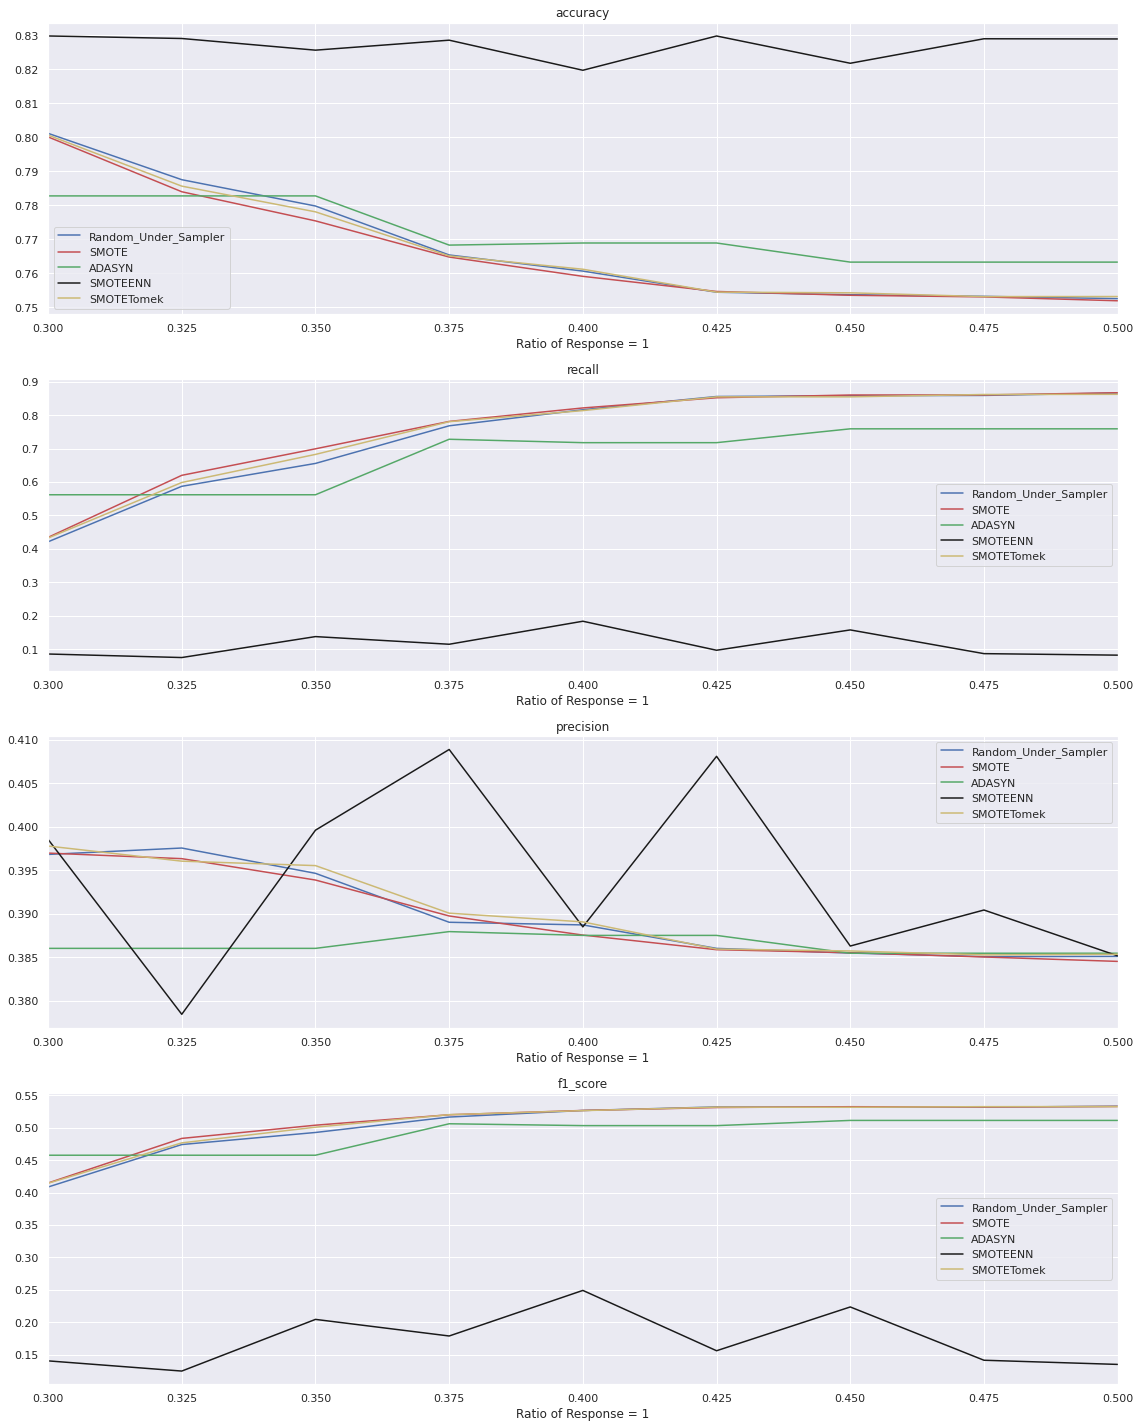

In [ ]:
f, ax = plt.subplots(4, 1, figsize = (16,20))

for i in range(4):
  ax[i].plot(rdu_score_dataframe.index, rdu_score_dataframe.iloc[:,i], c = "b")
  ax[i].plot(sm_score_dataframe.index, sm_score_dataframe.iloc[:,i], c = "r")
  ax[i].plot(adasyn_score_dataframe.index, adasyn_score_dataframe.iloc[:,i], c = "g")
  ax[i].plot(smoteenn_score_dataframe.index, smoteenn_score_dataframe.iloc[:,i], c = "k")
  ax[i].plot(smo_tom_score_dataframe.index, smo_tom_score_dataframe.iloc[:,i], c = "y")

  ax[i].legend(["Random_Under_Sampler", "SMOTE", "ADASYN", "SMOTEENN", "SMOTETomek"])
  ax[i].set_title(rdu_score_dataframe.columns[i])
  ax[i].set_xlabel("Ratio of Response = 1")
  ax[i].set_xlim(0.3,0.5)

plt.tight_layout()
plt.show()

* Accuracy score close to 0.84 is considerd bad, since the ratio of the target data is 84:16

## Visualization of increasing/decreasing scores as ratios change

Considering this graph as a derivative of the above should be easy

Using only 3 methods this time (Random Under Sampler, SMOTE, SMOTETomek)

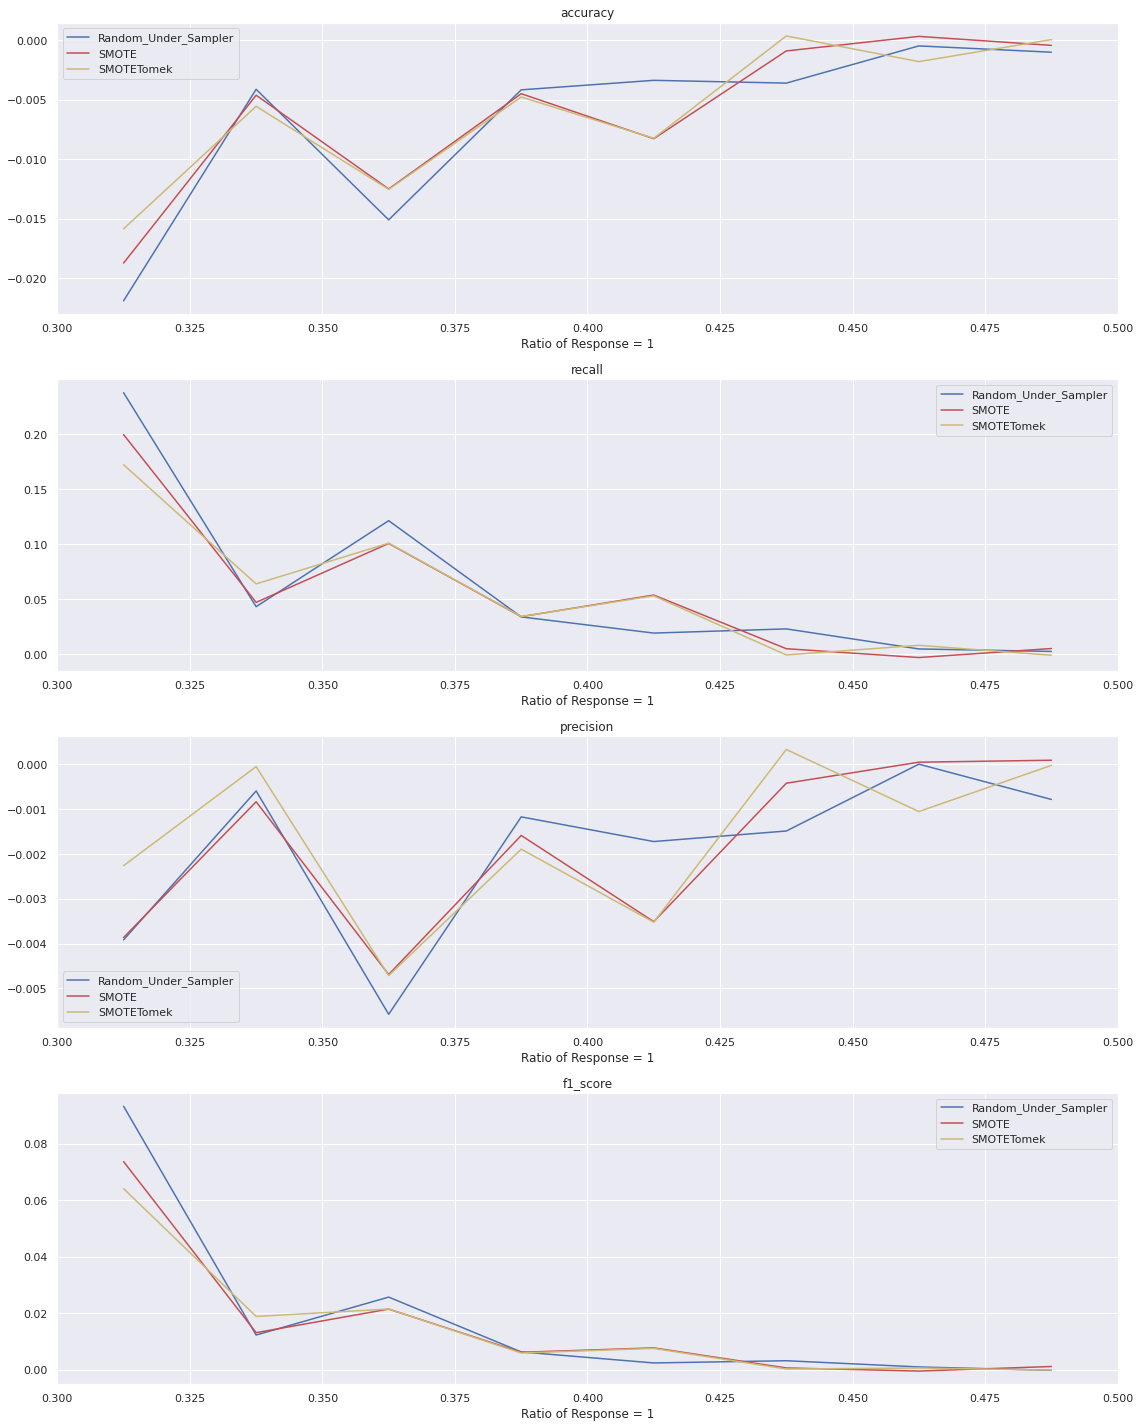

In [ ]:
s = [rdu_score_dataframe,sm_score_dataframe,smo_tom_score_dataframe]
colors = ["b", "r", "y"]
style = ["-", "-", "-"]

f, ax = plt.subplots(4, 1, figsize = (16,20))

for idx in range(3):
  df = s[idx]
  for c in range(4):
    value_list = []
    for i in range(1, len(df)):
      value = df.iloc[i,c] - df.iloc[i-1,c]
      value_list.append(value)
    ax[c].plot(df.index[:8] + [0.0125]*8, value_list, c = colors[idx], linestyle = style[idx])

for c in range(4):
  ax[c].legend(["Random_Under_Sampler", "SMOTE", "SMOTETomek"])
  ax[c].set_title(rdu_score_dataframe.columns[c])
  ax[c].set_xlabel("Ratio of Response = 1")
  ax[c].set_xlim(0.3,0.5)

plt.tight_layout()
plt.show()

# Choosing The Best Method

I chose SMOTE, with sampling_strategy as 0.5

In [ ]:
sm=SMOTE(sampling_strategy=0.5,random_state=0)
train_input_smote, train_target_smote=sm.fit_resample(train_input, train_target)

In [ ]:
#Then, training the classifier model with train_input_smote data
rf_best = RandomForestClassifier(n_estimators=200,random_state=0)
rf_best.fit(train_input_smote, train_target_smote)
prediction_best = rf_best.predict(test_input)
print('Accuracy for Random Forest is :', metrics.accuracy_score(test_target, prediction_best))
print('Recall for Random Forest is :', metrics.recall_score(test_target, prediction_best))
print("Precision for Random Forest is:", metrics.precision_score(test_target, prediction_best))
print("F1 Score for Random Forest is :", metrics.f1_score(test_target, prediction_best))

Accuracy for Random Forest is : 0.8072403880704276
Recall for Random Forest is : 0.7811123348017621
Precision for Random Forest is: 0.44792850827333586
F1 Score for Random Forest is : 0.5693585935618527


## Confusion Matrix

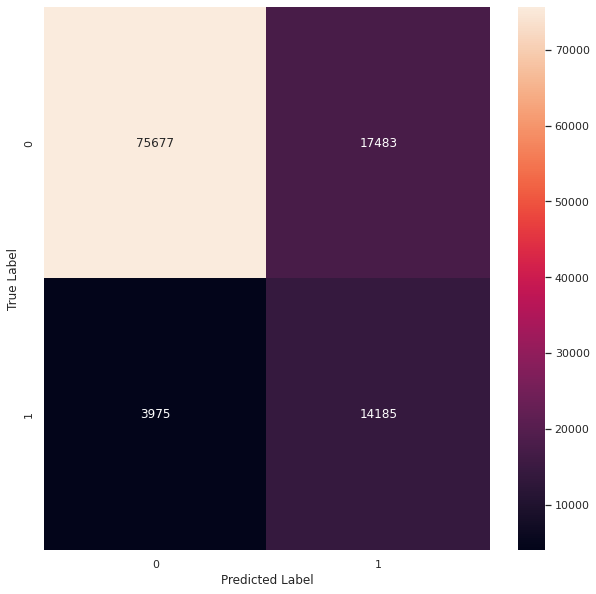

In [ ]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(confusion_matrix(test_target, prediction_best), annot = True, fmt='2.0f')
plt.subplots_adjust(hspace = 0.2, wspace = 0.2)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Feature Importances

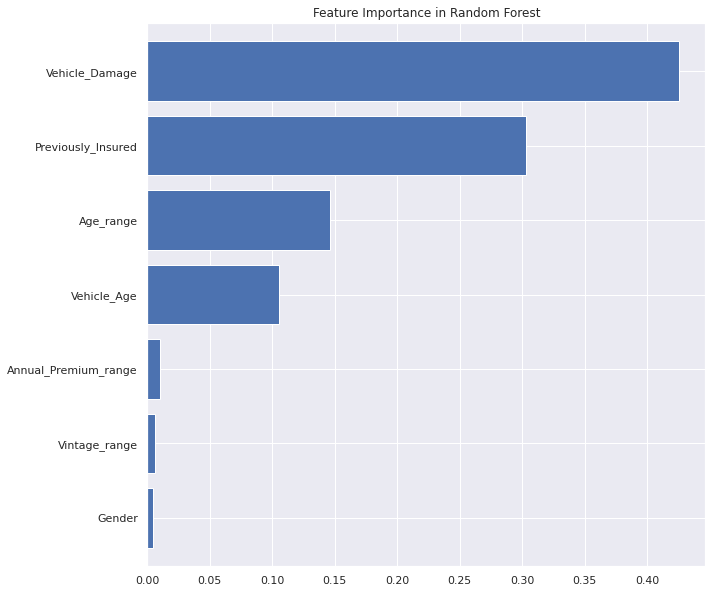

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (10,10))
pd.Series(rf_best.feature_importances_,Input.columns).sort_values(ascending=True).plot.barh(width=0.8)
plt.title('Feature Importance in Random Forest')
plt.show()